**EDA-Project 3**

файл: ```"netflix_titles.csv"```.


# предобработка данных

1.   type - сериал или фильм        
2.   title - название    
3.   director - режиссер  
4.   cast - актерский состав     
5.   country - страна/страны производства    
6.   date_added - дата добавления НА ПЛАТФОРМУ NETFLIX-a  
7.   release_year - год выпуска картины в свет
8.   rating - ВОЗРАСТНОЙ рейтинг      
9.   duration - продолжительность   
10.  listed_in - категория/жанр
11.  description - описание

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

data = pd.read_csv('netflix_titles.csv')
data

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                                       NaN                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233             

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Работа с пропусками

In [3]:
df0 = data.isna().sum()
print(df0[df0 > 0])

# смотрю столбцы, где есть пропуски

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64


### анализ пропусков

In [4]:
data[data.director.isna()].describe(include=['object'])

# смотрю записи где директор nan
# в основном директор не указан для СЕРИАЛОВ из США

type    title director                cast        country  \
count      1969     1969        0                1755           1664   
unique        2     1958        0                1710            152   
top     TV Show  Charmed      NaN  David Attenborough  United States   
freq       1841        2      NaN                  15            557   

             date_added rating  duration listed_in  \
count              1958   1965      1969      1969   
unique              902     12        87       249   
top     January 1, 2016  TV-MA  1 Season  Kids' TV   
freq                 27    675      1228       155   

                                              description  
count                                                1969  
unique                                               1969  
top     Jandino Asporaat riffs on the challenges of ra...  
freq                                                    1

In [5]:
data[data.cast.isna()].describe(include=['object'])

# в основном каст не указан для ДОКУМЕНТАЛЬНЫХ ФИЛЬМОВ из США

type             title    director cast        country  \
count     570               570         356    0            487   
unique      2               569         331    0            102   
top     Movie  The Birth Reborn  Hernán Zin  NaN  United States   
freq      360                 2           4  NaN            224   

            date_added rating  duration      listed_in  \
count              569    567       570            570   
unique             373     11       101             79   
top     March 31, 2017  TV-MA  1 Season  Documentaries   
freq                10    191       165            148   

                                              description  
count                                                 570  
unique                                                570  
top     As California's 2016 fire season rages, brave ...  
freq                                                    1

In [6]:
data[data.country.isna()].describe(include=['object'])

# в основном страна не указана для СЕРИАЛОВ для зрителей от 14 лет

type                                   title    director  \
count       476                                     476         171   
unique        2                                     475         150   
top     TV Show  Little Baby Bum: Nursery Rhyme Friends  Matt Askem   
freq        281                                       2           4   

                                                     cast country  \
count                                                 393       0   
unique                                                376       0   
top     Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sa...     NaN   
freq                                                    4     NaN   

             date_added rating  duration                          listed_in  \
count               474    472       476                                476   
unique              257     12        94                                108   
top     January 1, 2020  TV-14  1 Season  International TV Shows, TV Dramas   
freq                 14    154       248                                 42   

                                              description  
count                                                 476  
unique                                                476  
top     Comedian and celebrity impersonator Joaquín Re...  
freq                                                    1

In [7]:
data[data.date_added.isna()].describe(include=['object'])

# в основном дата добавления на платформу не указана для СЕРИАЛОВ из США

type            title director  \
count        11               11        0   
unique        2               11        0   
top     TV Show  Gunslinger Girl      NaN   
freq         10                1      NaN   

                                                     cast        country  \
count                                                  10              9   
unique                                                 10              4   
top     Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...  United States   
freq                                                    1              6   

       date_added rating   duration                       listed_in  \
count           0     10         11                              11   
unique          0      6          8                              10   
top           NaN  TV-14  2 Seasons  Classic & Cult TV, TV Comedies   
freq          NaN      3          4                               2   

                                              description  
count                                                  11  
unique                                                 11  
top     On the surface, the Social Welfare Agency appe...  
freq                                                    1

In [8]:
data[data.rating.isna()].describe(include=['object'])

# в основном рейтинг не указан для ФИЛЬМОВ из США

type                  title    director        cast        country  \
count      10                     10           6           7              6   
unique      2                     10           3           5              4   
top     Movie  Louis C.K.: Hilarious  Louis C.K.  Louis C.K.  United States   
freq        8                      1           3           3              3   

               date_added rating duration listed_in  \
count                   9      0       10        10   
unique                  8      0        7         4   
top     December 21, 2015    NaN   60 min    Movies   
freq                    2    NaN        3         7   

                                              description  
count                                                  10  
unique                                                 10  
top     Emmy-winning comedy writer Louis C.K. brings h...  
freq                                                    1

In [9]:
data[data.director.isna() & data.cast.isna() & data.country.isna() & data.date_added.isna() & data.rating.isna()]

# есть один фильм у которого не указан директор, каст, страна, дата добавления на нетфликс, рейтинг
# можно его удалить

show_id   type                                   title director cast  \
6231  80116008  Movie  Little Baby Bum: Nursery Rhyme Friends      NaN  NaN   

     country date_added  release_year rating duration listed_in  \
6231     NaN        NaN          2016    NaN   60 min    Movies   

                                            description  
6231  Nursery rhymes and original music for children...

In [10]:
# смотрю какой процент пропусков в этих признаках

pd.DataFrame({
    'director': data.director.value_counts(normalize=True, dropna=False)[np.nan] * 100,
    'cast': data.cast.value_counts(normalize=True, dropna=False)[np.nan] * 100,
    'country': data['country'].value_counts(normalize=True, dropna=False)[np.nan] * 100,
    'date_added': data['date_added'].value_counts(normalize=True, dropna=False)[np.nan] * 100,
    'rating': data['rating'].value_counts(normalize=True, dropna=False)[np.nan] * 100
}, index=['nan'])

# пропусков мало

director      cast   country  date_added    rating
nan  31.584857  9.143407  7.635547    0.176452  0.160411

### удаляю пропуски

In [11]:
data = data.dropna().reset_index(drop=True)
data

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     80125979    Movie                             #realityhigh   
2     70304989    Movie                                 Automata   
3     80164077    Movie       Fabrizio Copano: Solo pienso en mi   
4     70304990    Movie                              Good People   
...        ...      ...                                      ...   
3769  80063224  TV Show            The Great British Baking Show   
3770  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
3771  80115328  TV Show                             Sacred Games   
3772  80176842  TV Show                         Men on a Mission   
3773  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
1                         Fernando Lebrija   
2                              Gabe Ibáñez   
3          Rodrigo Toro, Francisco Schultz   
4                        Henrik Ruben Genz   
...                                    ...   
3769                       Andy Devonshire   
3770                         Thomas Astruc   
3771  Vikramaditya Motwane, Anurag Kashyap   
3772                            Jung-ah Im   
3773                             Onur Ünlü   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1     Nesta Cooper, Kate Walsh, John Michael Higgins...   
2     Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                       Fabrizio Copano   
4     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
...                                                 ...   
3769  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
3770  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
3771  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
3772  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
3773  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                             country         date_added  \
0           United States, India, South Korea, China  September 9, 2019   
1                                      United States  September 8, 2017   
2             Bulgaria, United States, Spain, Canada  September 8, 2017   
3                                              Chile  September 8, 2017   
4     United States, United Kingdom, Denmark, Sweden  September 8, 2017   
...                                              ...                ...   
3769                                  United Kingdom    August 30, 2019   
3770                      France, South Korea, Japan     August 2, 2019   
3771                            India, United States    August 15, 2019   
3772                                     South Korea      April 9, 2019   
3773                                          Turkey     April 15, 2017   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
1             2017  TV-14     99 min   
2             2014      R    110 min   
3             2017  TV-MA     60 min   
4             2014      R     90 min   
...            ...    ...        ...   
3769          2019  TV-PG  7 Seasons   
3770          2018  TV-Y7  4 Seasons   
3771          2019  TV-MA  2 Seasons   
3772          2019  TV-14  4 Seasons   
3773          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                              Comedies   
2     International Movies, Sci-Fi & Fantasy, Thrillers   
3                                       Stand-Up Comedy   
4                         Action & Adventure, Thrillers   
...                                                 ...   
3769                       British TV Shows, Reality TV   
3770                    Kids' TV, TV Action & Adventure   
3771  Crime TV 

In [12]:
data.show_id.value_counts()
# повторяющихся картин нет, можно удалять признак

show_id
81145628    1
70297799    1
80221637    1
80197301    1
19207412    1
           ..
80176716    1
80132961    1
80165857    1
70258366    1
80126599    1
Name: count, Length: 3774, dtype: int64

In [13]:
# data = data.drop(columns=['show_id'])

# Exploratory data analysis

- Target - rating. **Каково распределение возрастных рейтингов для фильмов и сериалов на платформе Netflix, и какие закономерности можно выявить в зависимости от других параметров?**

Для ответа сделать анализ:

1. Распределение возрастных рейтингов: Посчитать количество фильмов и сериалов для каждого возрастного рейтинга (например, "PG", "PG-13", "R", "NC-17", и т.д.).

2. Зависимость возрастного рейтинга от года выпуска: Посмотреть, как меняется распределение возрастных рейтингов с течением времени. Есть ли тренды по изменению рейтингов в течение лет?

3. Связь между возрастным рейтингом и страной производства: Определить, есть ли различия в распределении рейтингов в зависимости от страны производства контента.

4. Категории/жанры и возрастные рейтинги: Исследовать, какие категории/жанры чаще всего имеют тот или иной возрастной рейтинг.

5. Корреляция продолжительности контента с возрастным рейтингом: Проверить, существует ли связь между продолжительностью фильмов/сериалов и их возрастным рейтингом.

- Цель -  понять, какие факторы могут влиять на присвоение возрастных рейтингов для контента и выявить возможные закономерности в этом процессе. 

## Анализ целевой переменной

- Краткое описание каждого рейтинга вместе с возрастными ограничениями:

1. **TV-MA** (TV Mature Audience Only):
   - Возрастное ограничение: 17+
   - предназначен для взрослой аудитории и содержит более сильный контент, чем R.

2. **TV-14**:
   - Возрастное ограничение: 14+
   - Рекомендуется для подростков старше 14 лет. Может содержать насилие, сексуальные сюжеты, грубую речь или другие элементы, не подходящие для детей младшего возраста.

3. **TV-PG** (Parental Guidance Suggested):
    - Целевая аудитория: Материалы с этим рейтингом обычно направлены на широкий круг зрителей, включая детей и семейную аудиторию.
   - ориентирован на семейный просмотр. 
   - Рекомендуется родительское сопровождение.

4. **R**:
   - Возрастное ограничение: 17+
   - рекомендуется для взрослых или подростков старше 17 лет

5. **PG-13**:
   - Возрастное ограничение: 13+
   - Может содержать материалы, которые могут быть неподходящими для младших подростков без сопровождения взрослых.

6. **NR** (Not Rated):
   - Контент не имеет официального рейтинга или не был оценен организацией по рейтингованию.

7. **PG**:
   - Родительское руководство рекомендуется. Материалы могут быть неподходящими для маленьких детей.

8. **TV-Y7**:
   - Возрастное ограничение: 7+
   - Предназначено для детей от 7 лет и старше.

9. **TV-G**:
   - Общий аудитории.
   - Материалы подходят для всех возрастов. 

10. **TV-Y**:
    - Дети.
    - Предназначено для детей младшего возраста.

11. **TV-Y7-FV**:
    - Предупреждение для детей от 7 лет с фантастическими элементами.

12. **G**:
    - Общий аудитории.
    - Материалы подходят для всех возрастов.

13. **UR** (Unrated):
    - Фильм не получил официального рейтинга.

14. **NC-17**:
    - Возрастное ограничение: 18+
    - Рекомендуется только для взрослых из-за высокой степени насилия, сексуальных сцен и содержания.

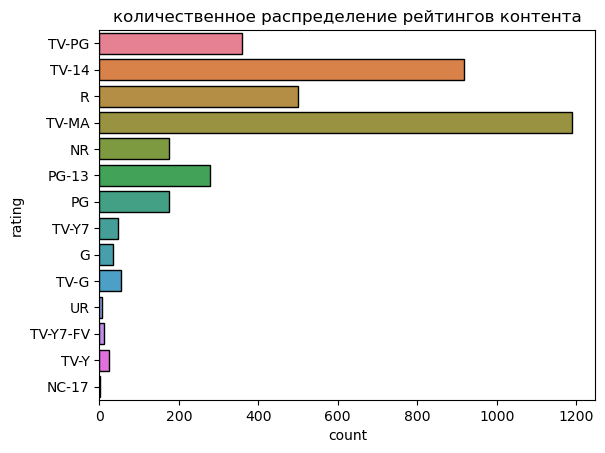

In [14]:
sns.countplot(data=data, 
             y='rating', 
              edgecolor='k',
             hue='rating',
             legend=False,
            ).set(title='количественное распределение рейтингов контента');

In [15]:
data.rating.value_counts()

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64

In [16]:
data[data.rating == 'NC-17']

show_id   type                      title             director  \
3256  70275600  Movie  Blue Is the Warmest Color  Abdellatif Kechiche   

                                                   cast  \
3256  Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...   

                     country       date_added  release_year rating duration  \
3256  France, Belgium, Spain  August 26, 2016          2013  NC-17  180 min   

                                             listed_in  \
3256  Dramas, Independent Movies, International Movies   

                                            description  
3256  Determined to fall in love, 15-year-old Adele ...

фильм с рейтингом NC-17 можно удалить, тк он 1

In [17]:
data.drop([3256], inplace=True)

In [18]:
data[data.rating == 'NR'].type.value_counts()

# NR и UR в основном фильмы, не имеющие официального рейтинга
# в будущем при анализе эти фильмы можно удалить

type
Movie    175
Name: count, dtype: int64

In [19]:
data[data.rating == 'UR'].type.value_counts()

type
Movie    7
Name: count, dtype: int64

In [20]:
data.rating.value_counts()

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
Name: count, dtype: int64

ТОП-5 снимаемых рейтингов на Netflix в общем среди контента:
1. TV-MA (Mature Audience Only): 17+ самый строгий
2. TV-14 (Parents Strongly Cautioned): 14+
3. TV-PG (Parental Guidance Suggested): для всех возрастов, рекомендуется родительское сопровождение
4. R (Restricted): 17+ (без сопровождения взрослых)
5. PG-13 (Parental Guidance Suggested) 13+

## Анализ признаков

In [21]:
data.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80125979  Movie                             #realityhigh   
2  70304989  Movie                                 Automata   
3  80164077  Movie       Fabrizio Copano: Solo pienso en mi   
4  70304990  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                 Fernando Lebrija   
2                      Gabe Ibáñez   
3  Rodrigo Toro, Francisco Schultz   
4                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1  Nesta Cooper, Kate Walsh, John Michael Higgins...   
2  Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                    Fabrizio Copano   
4  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
1                                   United States  September 8, 2017   
2          Bulgaria, United States, Spain, Canada  September 8, 2017   
3                                           Chile  September 8, 2017   
4  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year rating duration  \
0          2019  TV-PG   90 min   
1          2017  TV-14   99 min   
2          2014      R  110 min   
3          2017  TV-MA   60 min   
4          2014      R   90 min   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                           Comedies   
2  International Movies, Sci-Fi & Fantasy, Thrillers   
3                                    Stand-Up Comedy   
4                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  When nerdy high schooler Dani finally attracts...  
2  In a dystopian future, an insurance adjuster f...  
3  Fabrizio Copano takes audience participation t...  
4  A struggling couple can't believe their luck w...

In [22]:
data.describe()

# самый первый фильм выпущен в 1942 году
# самый поздний в этом датасете в 2020 году

show_id  release_year
count  3.773000e+03   3773.000000
mean   7.511036e+07   2012.087199
std    1.341269e+07      9.568200
min    2.477470e+05   1942.000000
25%    7.027594e+07   2011.000000
50%    8.014732e+07   2016.000000
75%    8.024072e+07   2017.000000
max    8.123573e+07   2020.000000

In [23]:
data.describe(include=["object"])

# больше всего в датасете драматических фильмов из США для зрителей от 17 лет

type        title                director         cast  \
count    3773         3773                    3773         3773   
unique      2         3751                    2919         3666   
top     Movie  The Silence  Raúl Campos, Jan Suter  Samuel West   
freq     3677            3                      18           10   

              country       date_added rating duration  \
count            3773             3773   3773     3773   
unique            432             1014     13      183   
top     United States  January 1, 2020  TV-MA   90 min   
freq             1323              105   1189       93   

                           listed_in  \
count                           3773   
unique                           296   
top     Dramas, International Movies   
freq                             237   

                                              description  
count                                                3773  
unique                                               3765  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3

### Анализ типов картин на Netflix - выпускается больше фильмов или сериалов?

In [24]:
data.type.value_counts(normalize=True)
# дисбаланс есть, но не выше 99%, признак можно оставлять

type
Movie      0.974556
TV Show    0.025444
Name: proportion, dtype: float64

In [25]:
# copy() нужен тк если изменить shows, это также повлияет на data, 
# так как обе переменные ссылаются на один и тот же объект DataFrame

movies = data[data.type == 'Movie'].copy()
shows = data[data.type == 'TV Show'].copy()

<Axes: xlabel='type', ylabel='count'>

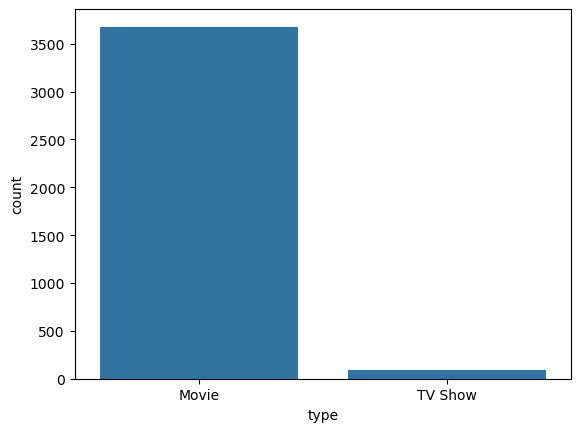

In [26]:
sns.countplot(data=data, x='type')

- фильмов выпускается на много больше чем сериалов

#### анализ записей с одинаковыми title  и description

- первые два фильма с одинаковым названием имеют одного и того же режиссера, жанр и актерский состав. Видимо в 2017 году была снята вторая часть 

In [27]:
data[data.title == 'The Silence']

show_id   type        title          director  \
1612  80244078  Movie  The Silence    Gajendra Ahire   
1613  80238292  Movie  The Silence    Gajendra Ahire   
3664  81021447  Movie  The Silence  John R. Leonetti   

                                                   cast  country  \
1612  Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...    India   
1613  Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...    India   
3664  Stanley Tucci, Kiernan Shipka, Miranda Otto, K...  Germany   

          date_added  release_year rating duration  \
1612   March 1, 2018          2017  TV-MA   90 min   
1613   March 1, 2018          2015  TV-MA   91 min   
3664  April 10, 2019          2019  TV-14   91 min   

                         listed_in  \
1612  Dramas, International Movies   
1613  Dramas, International Movies   
3664      Horror Movies, Thrillers   

                                            description  
1612  On a train in Mumbai, 20-something Chini witne...  
1613  After encountering a scene of sexual violence,...  
3664  With the world under attack by deadly creature...

- все три фильма имеют одного и того же директора, каст, страну, год релиза, рейтинг, жанты и описание, но разное название и длительность - вывод - это трилогия

In [28]:
data[data.description.str.startswith('A surly septuagenarian gets another chance at ')]

show_id   type                 title             director  \
66   81186758  Movie  Oh! Baby (Malayalam)  B. V. Nandini Reddy   
67   81186757  Movie      Oh! Baby (Tamil)  B. V. Nandini Reddy   
141  81093951  Movie              Oh! Baby  B. V. Nandini Reddy   

                                                  cast country  \
66   Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   India   
67   Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   India   
141  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   India   

             date_added  release_year rating duration  \
66   September 25, 2019          2019  TV-14  146 min   
67   September 25, 2019          2019  TV-14  146 min   
141  September 14, 2019          2019  TV-14  157 min   

                                            listed_in  \
66   Comedies, International Movies, Music & Musicals   
67   Comedies, International Movies, Music & Musicals   
141  Comedies, International Movies, Music & Musicals   

                                           description  
66   A surly septuagenarian gets another chance at ...  
67   A surly septuagenarian gets another chance at ...  
141  A surly septuagenarian gets another chance at ...

### ТОП-15 стран, наиболее часто выпускающих фильмы и сериалы

In [29]:
data.country.value_counts().head(15)

# больше всего картин из США Индии и Великобритании

country
United States                    1323
India                             707
United Kingdom                    152
Canada                             78
Spain                              72
Turkey                             60
Japan                              54
Mexico                             51
Hong Kong                          48
France                             46
Philippines                        43
Indonesia                          43
Egypt                              41
United Kingdom, United States      38
South Korea                        38
Name: count, dtype: int64

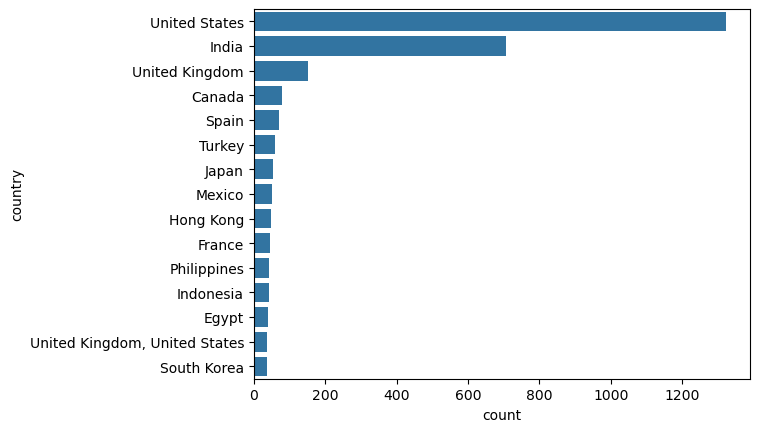

In [30]:
sns.countplot(data=data, y='country', 
              order=data['country'].value_counts().index[:15]);

#  наибольшее кол-во снятых фильмов\сериалов приходится на США Индию и Великобританию

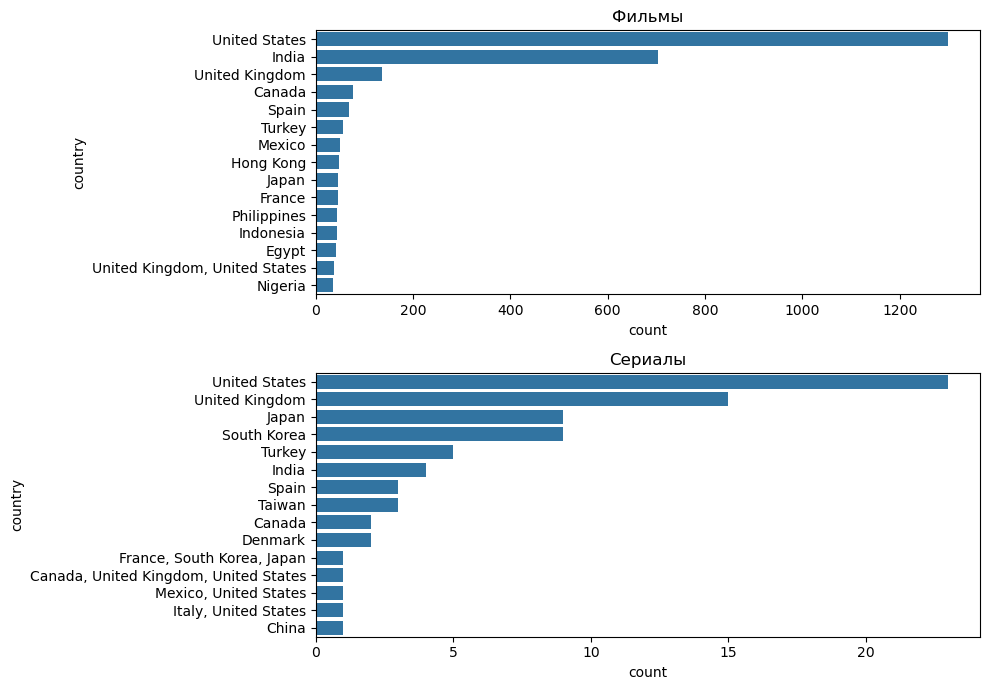

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
sns.countplot(data=movies, y='country', 
              order=movies['country'].value_counts().index[:15], ax=axs[0]).set(title='Фильмы')
sns.countplot(data=shows, y='country', 
              order=shows['country'].value_counts().index[:15], ax=axs[1]).set(title='Сериалы')
plt.tight_layout();

# в фильмах лидируют США, Индия и Великобритания
# в сериалах - США, Великобритания и Япония

#### если разделить страны по запятой

##### def parse(param)

In [32]:
# функция парсит значения перечисленные в столбце через запятую и 
# возвращает series с учетом изначального кол-ва повторений каждого значения

def parse(param):
    values = []
    for value in param.values:
        if ',' in value:
            value = value.split(",")
            for v in value:
                values.append(v.strip())

    return pd.Series(values)

In [33]:
countries = parse(data.country)
countries.value_counts().head(15)

United States     395
United Kingdom    189
France            144
Canada            116
Germany            84
China              60
India              55
Belgium            53
Spain              47
Hong Kong          43
Australia          38
Italy              27
Mexico             27
Japan              26
Argentina          25
Name: count, dtype: int64

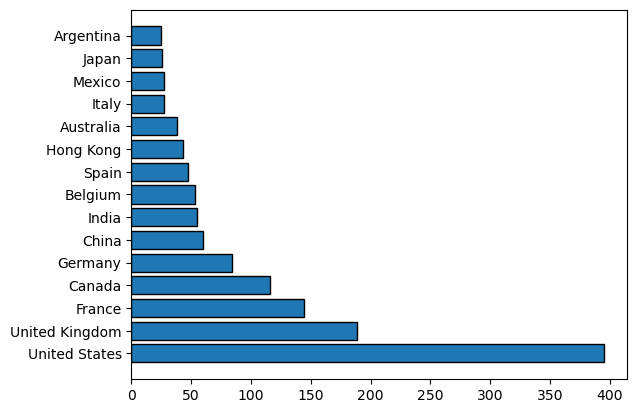

In [34]:
plt.barh(y=countries.value_counts().head(15).index,
       width=countries.value_counts().head(15).values,
        edgecolor='k');

- в наибольшем кол-ве съемок картин учавствовали страны США, Великобритания и Франция

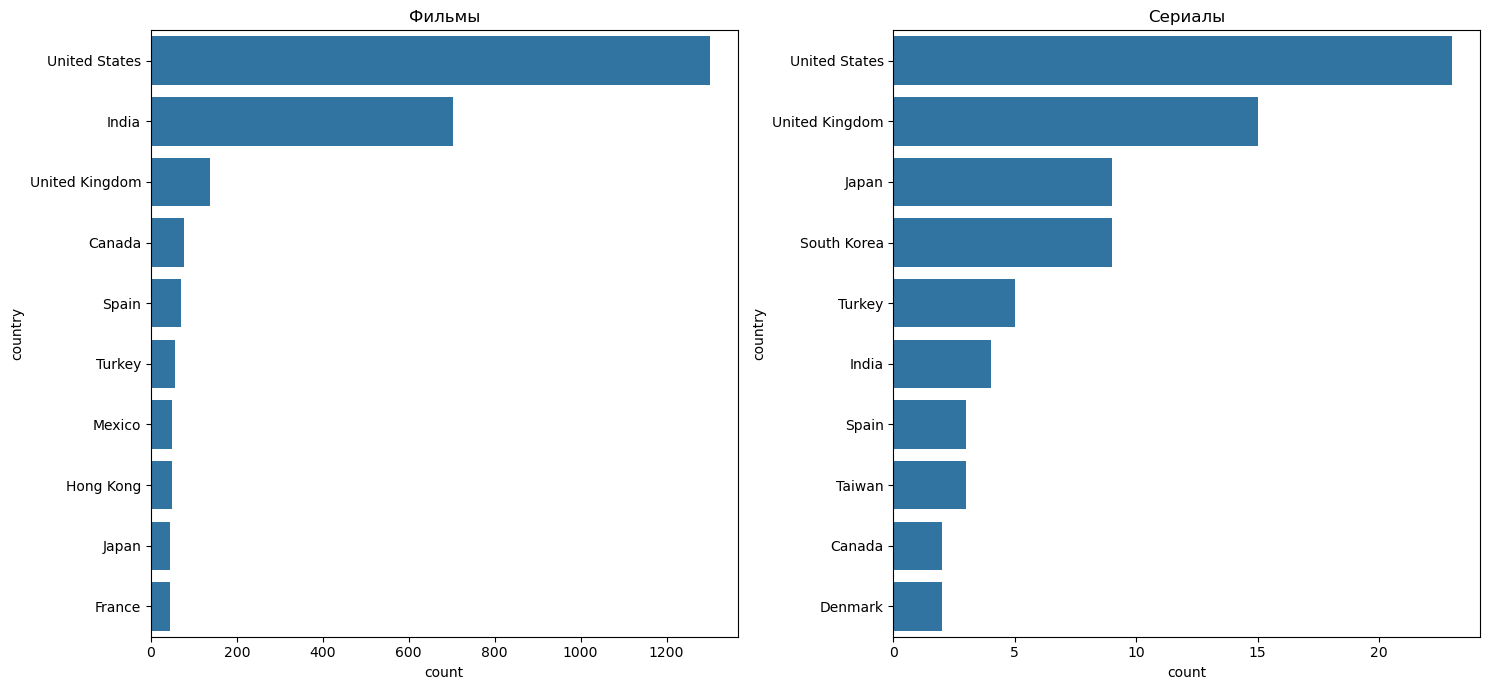

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(data=movies, y='country', 
              order=movies['country'].value_counts().index[:10], ax=axs[0]).set(title='Фильмы')

sns.countplot(data=shows, y='country', 
              order=shows['country'].value_counts().index[:10], ax=axs[1]).set(title='Сериалы');

plt.tight_layout()

- в наибольшем кол-ве съемок фильмов учавствовали страны США, Индия и Великобритания
- в наибольшем кол-ве съемок сериалов учавствовали страны США, Великобритания и Япония

In [36]:
# кол-во неповторяющихся стран 

countries.unique().size

91

### В каком году было выпущено больше всего контента?

In [37]:
data.release_year.describe()

# самый ранний год выпуска 1942
# самый поздний в датасете 2020

count    3773.000000
mean     2012.087199
std         9.568200
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2017.000000
max      2020.000000
Name: release_year, dtype: float64

In [38]:
data.release_year.value_counts().head(10)

# больше всего картин было выпущено в свет в 2017 году

release_year
2017    585
2018    537
2016    514
2019    326
2015    324
2014    196
2013    154
2012    117
2010    102
2011     94
Name: count, dtype: int64

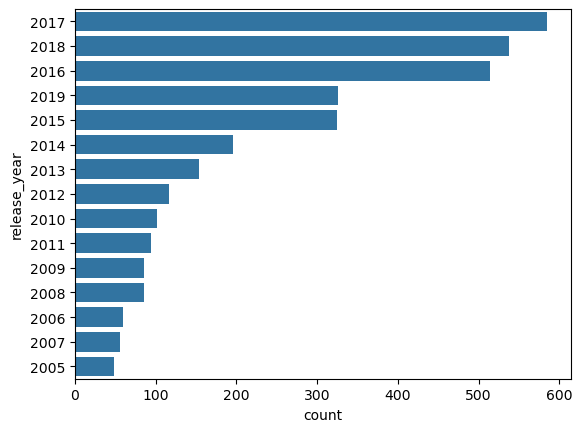

In [39]:
sns.countplot(data=data, y='release_year', 
              order=data['release_year'].value_counts().index[:15]);

# год в котором было выпущено больше всего картин - 2017 год

median:  2016.0


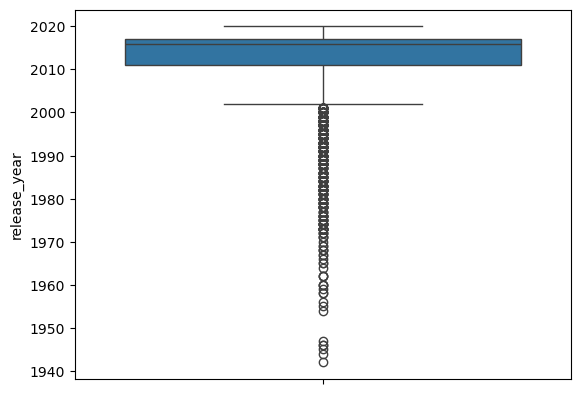

In [40]:
sns.boxplot(data.release_year)
print('median: ', data.release_year.median())

# большинство фильмов выпущено в 2010-2019 годах

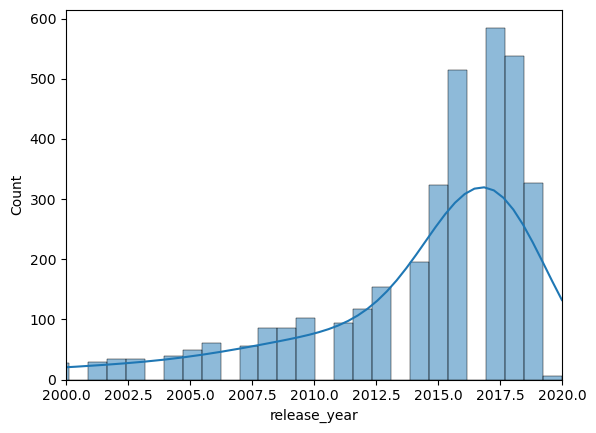

In [41]:
sns.histplot(data.release_year, kde=True);
plt.xlim([2000, 2020]);
# большинство картин сняты в 2015-2019 годах

### когда чаще и реже всего заливается контент на нетфликсе?

In [42]:
data['year_added'] = data.date_added.apply(
    lambda x: datetime.datetime.strptime(x.strip(), "%B %d, %Y").year if x != 'Не указано' else x)
data['month_added'] = data.date_added.apply(
    lambda x: datetime.datetime.strptime(x.strip(), "%B %d, %Y").strftime('%B') if x != 'Не указано' else x)

movies = data[data.type == 'Movie'].copy()
shows = data[data.type == 'TV Show'].copy()
# разделяю date_added на месяц и год добавления фильма на платформу

In [43]:
data.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80125979  Movie                             #realityhigh   
2  70304989  Movie                                 Automata   
3  80164077  Movie       Fabrizio Copano: Solo pienso en mi   
4  70304990  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                 Fernando Lebrija   
2                      Gabe Ibáñez   
3  Rodrigo Toro, Francisco Schultz   
4                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1  Nesta Cooper, Kate Walsh, John Michael Higgins...   
2  Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                    Fabrizio Copano   
4  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
1                                   United States  September 8, 2017   
2          Bulgaria, United States, Spain, Canada  September 8, 2017   
3                                           Chile  September 8, 2017   
4  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year rating duration  \
0          2019  TV-PG   90 min   
1          2017  TV-14   99 min   
2          2014      R  110 min   
3          2017  TV-MA   60 min   
4          2014      R   90 min   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                           Comedies   
2  International Movies, Sci-Fi & Fantasy, Thrillers   
3                                    Stand-Up Comedy   
4                      Action & Adventure, Thrillers   

                                         description  year_added month_added  
0  Before planning an awesome wedding for his gra...        2019   September  
1  When nerdy high schooler Dani finally attracts...        2017   September  
2  In a dystopian future, an insurance adjuster f...        2017   September  
3  Fabrizio Copano takes audience participation t...        2017   September  
4  A struggling couple can't believe their luck w...        2017   September

In [44]:
# data.year_added.replace('Не указано', 0, inplace=True)
data.year_added = data.year_added.astype(int)

# переводим столбец year_added в int

In [45]:
data.year_added[data.year_added > 0].describe()

# самая первая картина залита на платформу в 2008 году

count    3773.000000
mean     2018.012987
std         1.212602
min      2008.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: year_added, dtype: float64

In [46]:
print(data['year_added'].value_counts())
print('\nnunique:', data['year_added'].nunique())

# в 2019 году было больше всего залито картин

year_added
2019    1386
2018    1140
2017     805
2016     210
2020     140
2015      50
2014      14
2011      13
2013       7
2012       4
2009       2
2010       1
2008       1
Name: count, dtype: int64

nunique: 13


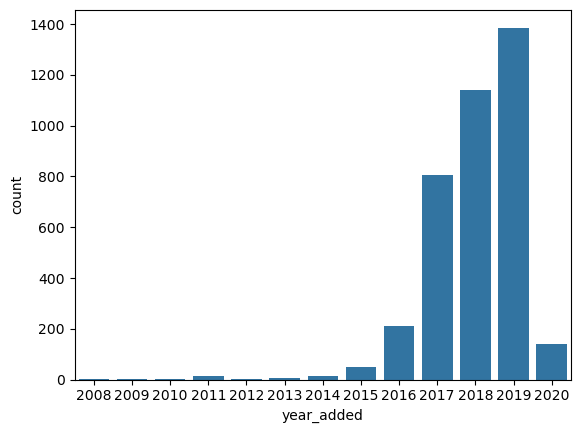

In [47]:
sns.countplot(data=data[data.year_added > 0], x='year_added');

# видим, что больше всего картин было залито в 2019 и 2018 году
# в 2020 на нетфликс резко уменьшился контент - скорее всего изза пандемии

/var/folders/7c/bld0hwzj2fl10kzg_g4v09c80000gn/T/ipykernel_1933/377197534.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation=70);


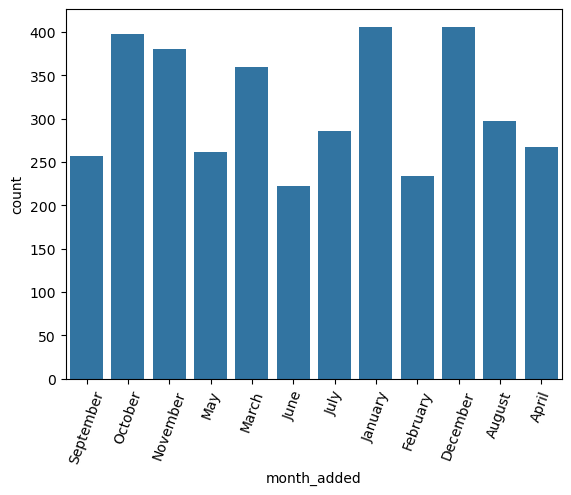

In [48]:
s = sns.countplot(data=data, x='month_added')
s.set_xticklabels(s.get_xticklabels(), rotation=70);

# больше всего картин заливается в декабре и январе - возможно под новый год
# меньше всего по статистике в июне

### Какой месяц самый привлекательный для релиза на платформу для стороннего производителя? 

найти месяц с самым малым кол-вом контента

In [49]:
data

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     80125979    Movie                             #realityhigh   
2     70304989    Movie                                 Automata   
3     80164077    Movie       Fabrizio Copano: Solo pienso en mi   
4     70304990    Movie                              Good People   
...        ...      ...                                      ...   
3769  80063224  TV Show            The Great British Baking Show   
3770  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
3771  80115328  TV Show                             Sacred Games   
3772  80176842  TV Show                         Men on a Mission   
3773  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
1                         Fernando Lebrija   
2                              Gabe Ibáñez   
3          Rodrigo Toro, Francisco Schultz   
4                        Henrik Ruben Genz   
...                                    ...   
3769                       Andy Devonshire   
3770                         Thomas Astruc   
3771  Vikramaditya Motwane, Anurag Kashyap   
3772                            Jung-ah Im   
3773                             Onur Ünlü   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1     Nesta Cooper, Kate Walsh, John Michael Higgins...   
2     Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                       Fabrizio Copano   
4     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
...                                                 ...   
3769  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
3770  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
3771  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
3772  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
3773  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                             country         date_added  \
0           United States, India, South Korea, China  September 9, 2019   
1                                      United States  September 8, 2017   
2             Bulgaria, United States, Spain, Canada  September 8, 2017   
3                                              Chile  September 8, 2017   
4     United States, United Kingdom, Denmark, Sweden  September 8, 2017   
...                                              ...                ...   
3769                                  United Kingdom    August 30, 2019   
3770                      France, South Korea, Japan     August 2, 2019   
3771                            India, United States    August 15, 2019   
3772                                     South Korea      April 9, 2019   
3773                                          Turkey     April 15, 2017   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
1             2017  TV-14     99 min   
2             2014      R    110 min   
3             2017  TV-MA     60 min   
4             2014      R     90 min   
...            ...    ...        ...   
3769          2019  TV-PG  7 Seasons   
3770          2018  TV-Y7  4 Seasons   
3771          2019  TV-MA  2 Seasons   
3772          2019  TV-14  4 Seasons   
3773          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                              Comedies   
2     International Movies, Sci-Fi & Fantasy, Thrillers   
3                                       Stand-Up Comedy   
4                         Action & Adventure, Thrillers   
...                                                 ...   
3769                       British TV Shows, Reality TV   
3770                    Kids' TV, TV Action & Adventure   
3771  Crime TV 

In [50]:
months = 'January, February, March, April, May, June, July, August, September, October, November, December'.split(
    ', ')[::-1]

In [51]:
df = data[(data.year_added > 0) & (data.month_added != 'Не указано')].groupby(
    'year_added')['month_added'].value_counts().unstack().fillna(0)[months].T
df

year_added   2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
month_added                                                               
December      0.0   0.0   0.0   0.0   1.0   2.0   4.0  12.0  47.0  82.0   
November      0.0   1.0   1.0   0.0   1.0   2.0   1.0   2.0  25.0  51.0   
October       0.0   0.0   0.0  11.0   0.0   1.0   3.0  11.0  32.0  89.0   
September     0.0   0.0   0.0   1.0   0.0   1.0   0.0   6.0  14.0  70.0   
August        0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0  19.0  68.0   
July          0.0   0.0   0.0   0.0   1.0   0.0   1.0   5.0  19.0  48.0   
June          0.0   0.0   0.0   0.0   0.0   0.0   1.0   3.0   7.0  59.0   
May           0.0   1.0   0.0   1.0   0.0   0.0   0.0   4.0   8.0  78.0   
April         0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  10.0  55.0   
March         0.0   0.0   0.0   0.0   0.0   1.0   0.0   2.0  14.0  92.0   
February      0.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   8.0  61.0   
January       1.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   7.0  52.0   

year_added    2018   2019   2020  
month_added                       
December     102.0  156.0    0.0  
November     112.0  184.0    0.0  
October      128.0  123.0    0.0  
September     76.0   89.0    0.0  
August       124.0   83.0    0.0  
July         120.0   92.0    0.0  
June          42.0  110.0    0.0  
May           66.0  103.0    0.0  
April         88.0  112.0    0.0  
March        132.0  118.0    0.0  
February      55.0  107.0    0.0  
January       95.0  109.0  140.0

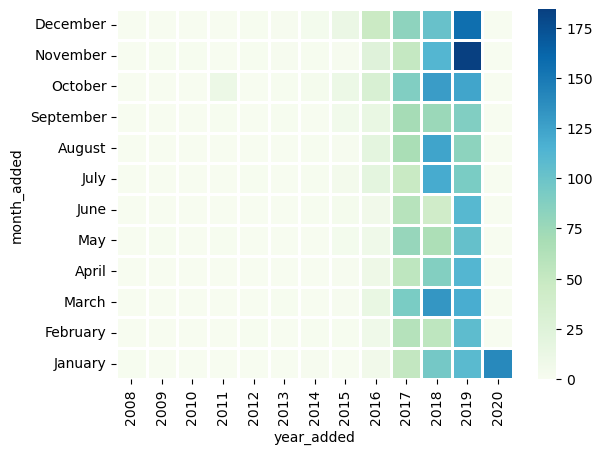

In [52]:
sns.heatmap(df, cmap='GnBu', edgecolors='white', linewidth=2);

- видим по тепловой карте, что в 2019 году больше всего контента было выпущено в ноябре, декабре, октябре. 
А меньше всего в сентябре, августе и в июле. Следовательно для стороннего производителя в эти месяцы было бы мало конкурентов

### сколько в среднем длятся фильмы и сериалы на Netflix?

#### Сериалы

In [53]:
shows.duration.value_counts()

# чаще всего сериалы длятся 1 сезон

duration
1 Season      65
2 Seasons      8
4 Seasons      6
5 Seasons      4
3 Seasons      4
7 Seasons      3
8 Seasons      2
6 Seasons      2
9 Seasons      1
14 Seasons     1
Name: count, dtype: int64

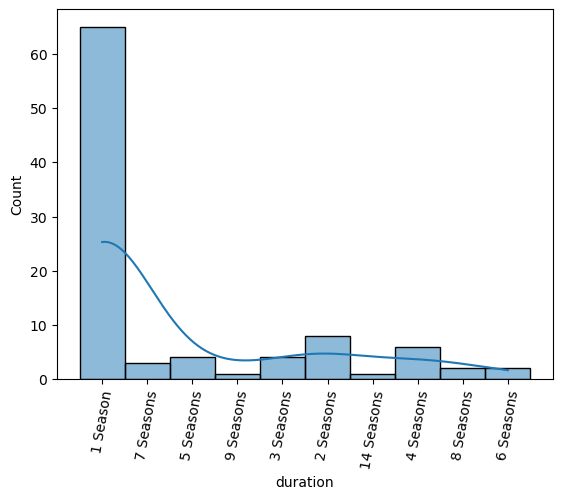

In [54]:
sns.histplot(data=shows, x='duration', kde=True);
plt.xticks(rotation=80);

# чаще всего продолжительность сериалов - 1 2 и 3 сезона

In [55]:
shows.duration.apply(lambda x: int(x.split(" ")[0])).mean()
# в среднем сериалы длятся 2 сезона

2.1770833333333335

#### фильмы

In [56]:
movies.duration.value_counts()

duration
90 min     93
95 min     88
92 min     88
94 min     88
91 min     85
           ..
209 min     1
41 min      1
14 min      1
187 min     1
195 min     1
Name: count, Length: 173, dtype: int64

In [57]:
movies.duration = movies.duration.apply(lambda x: int(x.split(" ")[0]))
# перевожу продолжительность фильмов в int тип

In [58]:
movies.duration.value_counts()

duration
90     93
95     88
92     88
94     88
91     85
       ..
209     1
41      1
14      1
187     1
195     1
Name: count, Length: 173, dtype: int64

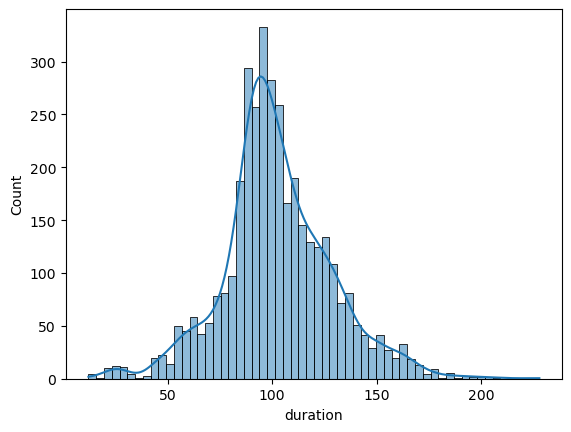

In [59]:
sns.histplot(data=movies, x='duration', kde=True);

# видим, что чаще всего продолжительность фильмов примерно 1.5 - 2 часа

### ТОП самых популярных жанров фильмов и сериалов

In [60]:
data.listed_in.value_counts().head(5)

# рейтинг популярности жанров картин

listed_in
Dramas, International Movies                        237
Stand-Up Comedy                                     234
Dramas, Independent Movies, International Movies    183
Comedies, Dramas, International Movies              168
Documentaries                                       136
Name: count, dtype: int64

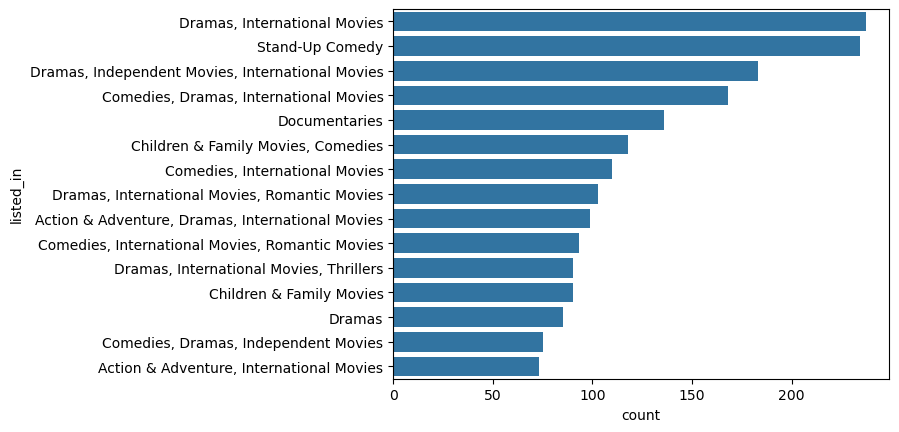

In [61]:
sns.countplot(data=data, y='listed_in',
              stat='count',
              order=data['listed_in'].value_counts().index[:15]);

# популярнее всего среди картин - жанр драм и стендап комендий

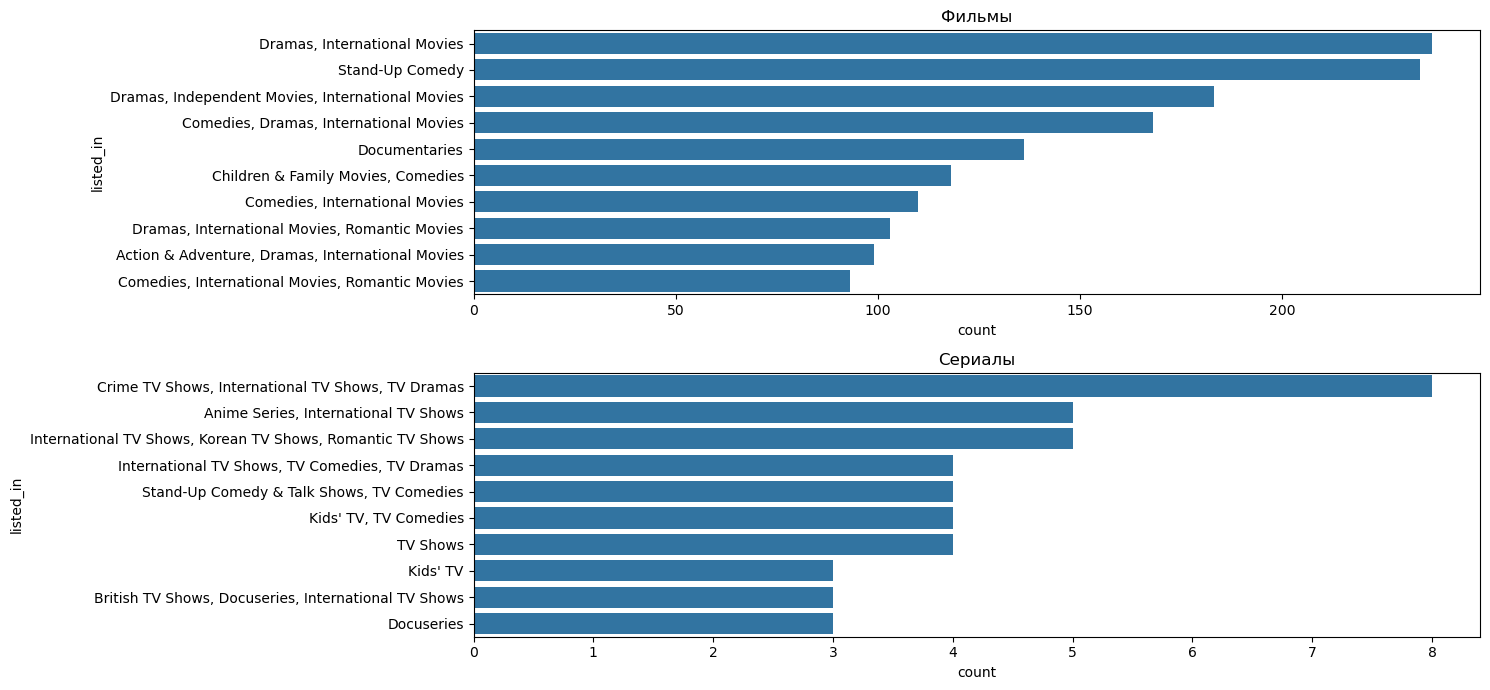

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

sns.countplot(data=movies, y='listed_in', 
              order=movies['listed_in'].value_counts().index[:10], ax=axs[0]).set(title='Фильмы')

sns.countplot(data=shows, y='listed_in', 
              order=shows['listed_in'].value_counts().index[:10], ax=axs[1]).set(title='Сериалы');

plt.tight_layout()

# популярные жанры среди фильмов и сериалов

больше всего сериалов\шоу в жанрах:
1. криминал и драмы
2. аниме
3. корейские романтические дорамы
4. комедии
5. стендап

больше всего фильмов в жанрах:
1. драмы
2. стендап
3. комедии
4. документальные фильмы
5. семейные фильмы

In [63]:
categories = parse(data.listed_in)
categories.value_counts().head(5)

# если брать категории по отдельности, больше всего картин в жанрах International Movies, Dramas и Comedies

International Movies    1721
Dramas                  1486
Comedies                 990
Independent Movies       543
Action & Adventure       515
Name: count, dtype: int64

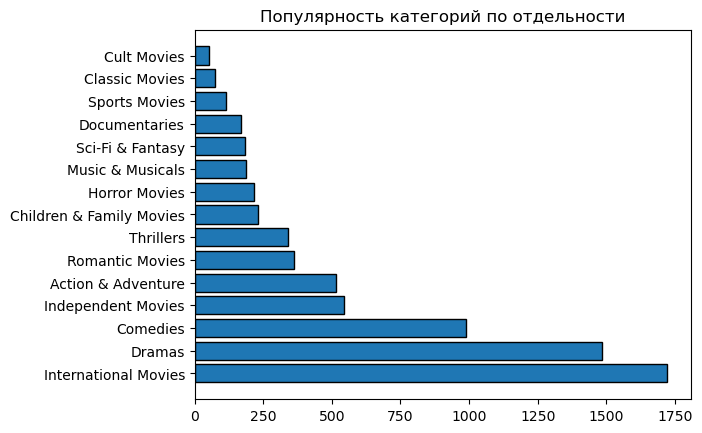

In [64]:
plt.barh(y=categories.value_counts().head(15).index,
       width=categories.value_counts().head(15).values,
        edgecolor='k');
plt.title('Популярность категорий по отдельности');

- видим, что нетфликс чаще всего производит контент интернациональный

## 1. Распределение возрастных рейтингов
Посчитать количество фильмов и шоу для каждого возрастного рейтинга (например, "PG", "PG-13", "R", "NC-17", и т.д.).

записи с рейтингами "не оценен" все фильмы. У меня целевой переменной является рейтинг, значит записи без рейтингов можно удалить 

In [65]:
print('До:', data.shape)
data = data[data.rating != 'NR']
data = data[data.rating != 'UR']
print('После:', data.shape)

До: (3773, 14)
После: (3591, 14)


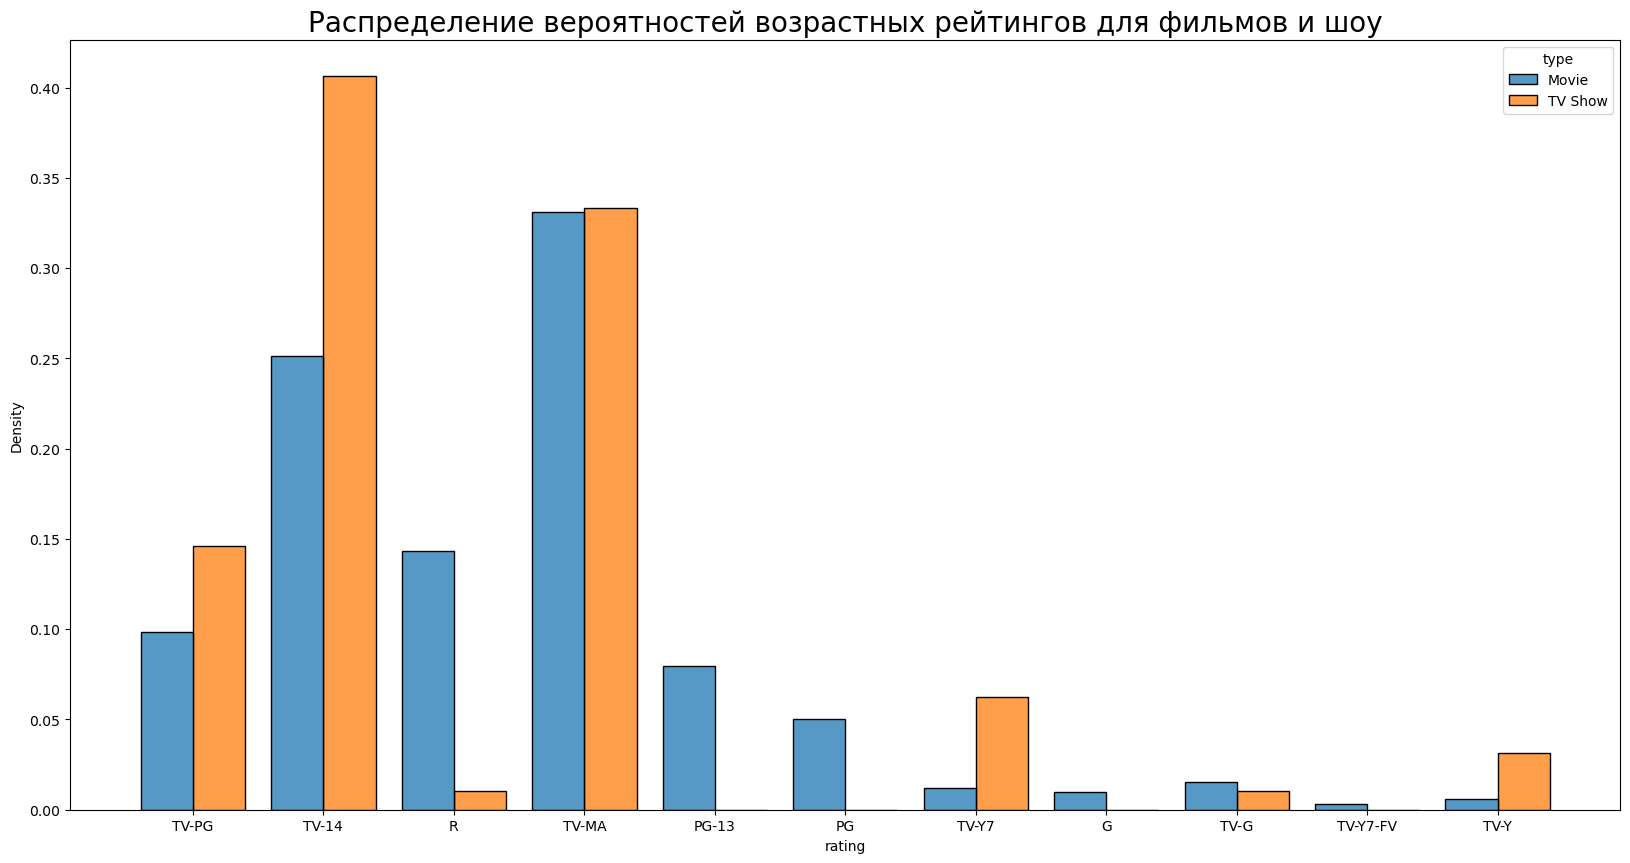

In [66]:
plt.figure(figsize=(20, 10))

sns.histplot(
    data,
    x="rating",
    shrink=0.8,
    hue="type",
    multiple="dodge",
    stat="density",
    common_norm=False # чтобы вероятности рейтингов фильмов и шоу не зависили друг от друга
).set_title(
        'Распределение вероятностей возрастных рейтингов для фильмов и шоу',
        fontsize=20);

# вероятности использовала для нормализации, тк фильмов больше шоу в 2 раза

### Вывод:
- шоу в основном снимается на семейный просмотр, для детей и подростков
- на взрослую аудиторию больше снимается фильмов

## 2. Зависимость возрастного рейтинга от года выпуска
Посмотреть, как меняется распределение возрастных рейтингов с течением времени. Есть ли тренды по изменению рейтингов в течение лет?

- в качестве года выпуска брала признак year_added, тк это год когда нетфликс заливал фильм на платформу

Text(0.5, 1.0, 'Процент рейтингов по годам (где больше всего данных)')

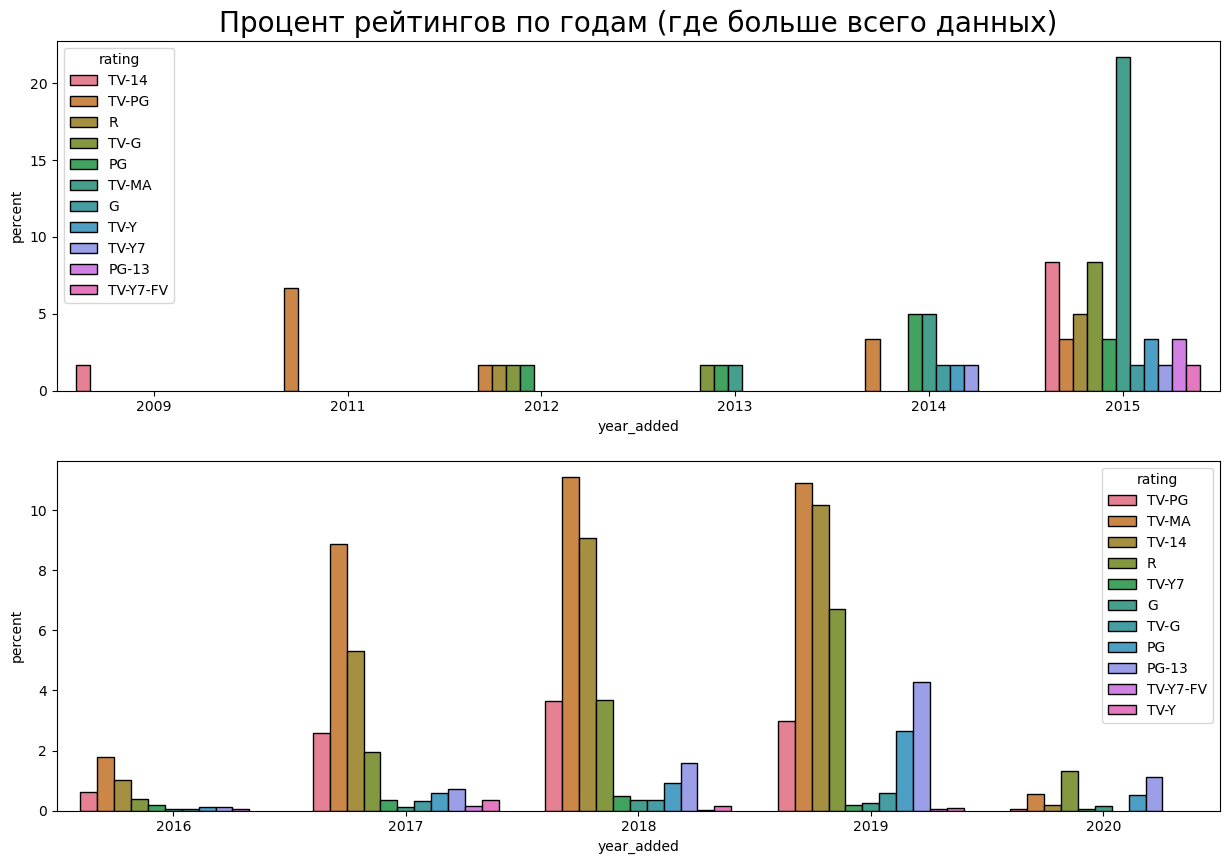

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns_plot = sns.countplot(data=data[data.year_added < 2016],
                         x='year_added',
                         hue='rating',
                         edgecolor='k',
                         stat='percent',
                         ax=axs[0])
axs[0].set_title('Процент рейтингов по годам (где больше всего данных)',
                 fontsize=20)

sns_plot = sns.countplot(data=data[(data.year_added > 2015)],
                         x='year_added',
                         hue='rating',
                         edgecolor='k',
                         stat='percent',
                         ax=axs[1])
axs[0].set_title('Процент рейтингов по годам (где больше всего данных)',
                 fontsize=20)

<Axes: xlabel='rating', ylabel='percent'>

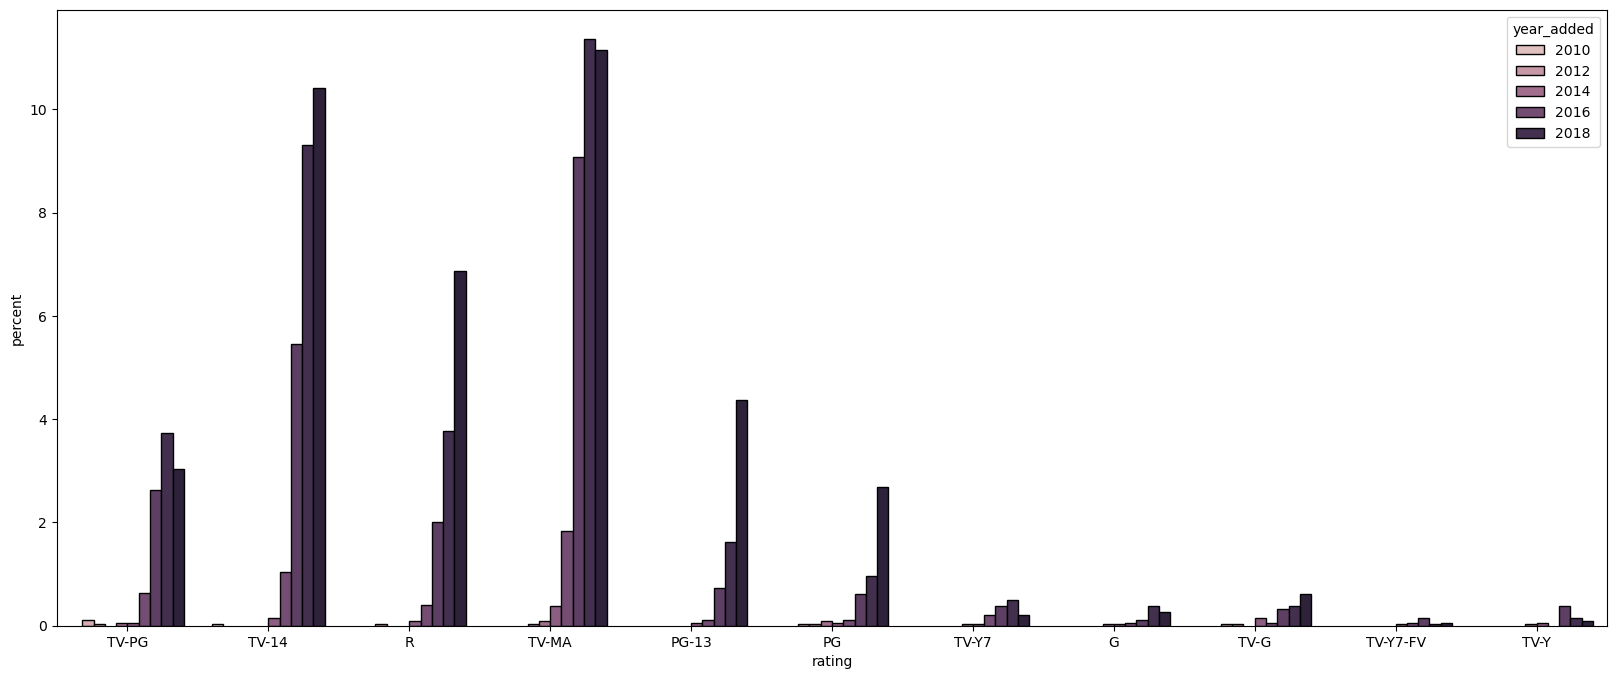

In [68]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data[(data.year_added != 2020)],
              x='rating',
              hue='year_added',
              edgecolor='k',
              stat='percent')

по графикам видно (особенно по второму), что: 
- в 2020 году процент во всех рейтингах резко и заметно уменьшается, что говорит о влиянии пандемии. (поэтому я удалила этот год с графиков)
- кол-во картин в рейтингах TV-MA TV-14 и R заметно растут с течением времени
- рост контента для детей (TV-Y7-FV, TV-Y7, TV-Y) не наблюдается

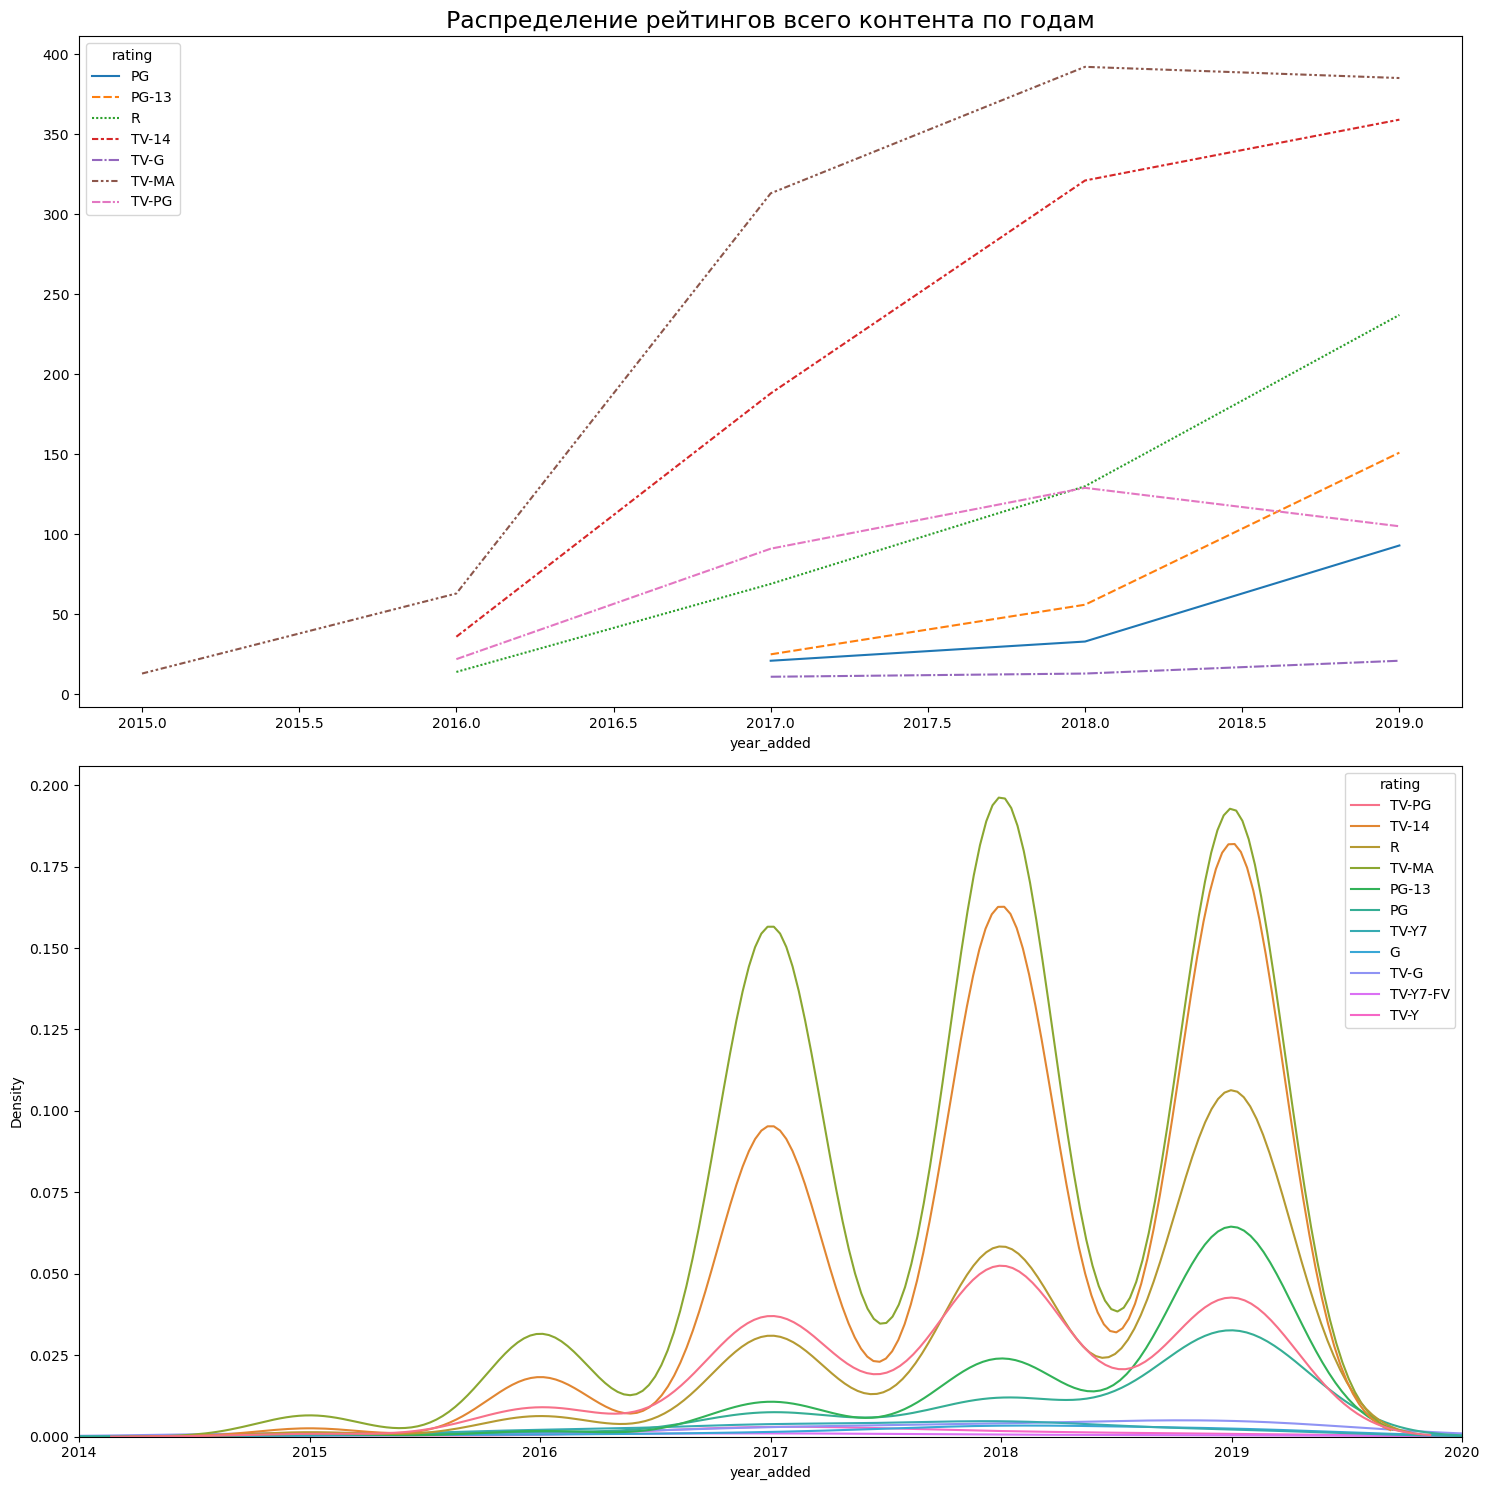

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

# 1
df = data[(data.year_added > 2014) & (data.year_added < 2020)].groupby(
    ['year_added', 'rating'])[['show_id']].count().reset_index()

shows_wide = (df.pivot(index="year_added", columns="rating", values="show_id"))

sns.lineplot(data=shows_wide[shows_wide > 10].dropna(axis=1, thresh=3),
             ax=axs[0]).set_title(
                 'Распределение рейтингов всего контента по годам',
                 fontsize=17)
# plt.ylim([0, 100])

# 2
filtered_data = data[(data.year_added > 2014) & (data.year_added != 2020)]

sns.kdeplot(filtered_data, x="year_added", hue="rating", ax=axs[1], warn_singular=False)
plt.xlim([2014, 2020])
plt.tight_layout()

по графику видим, что:
- в 2015-2016 году на нетфликс выпускался в основном контент для подростков, затем для взрослых и много контента без возрастного рейтинга
- контент TV-MA TV-14 и R уверенно увеличиваются с течением времени
- TV-PG (для семьи) вырос в 2017 году и больше никак не изменяется до 2019
- контент для детей и для общей массы не меняется

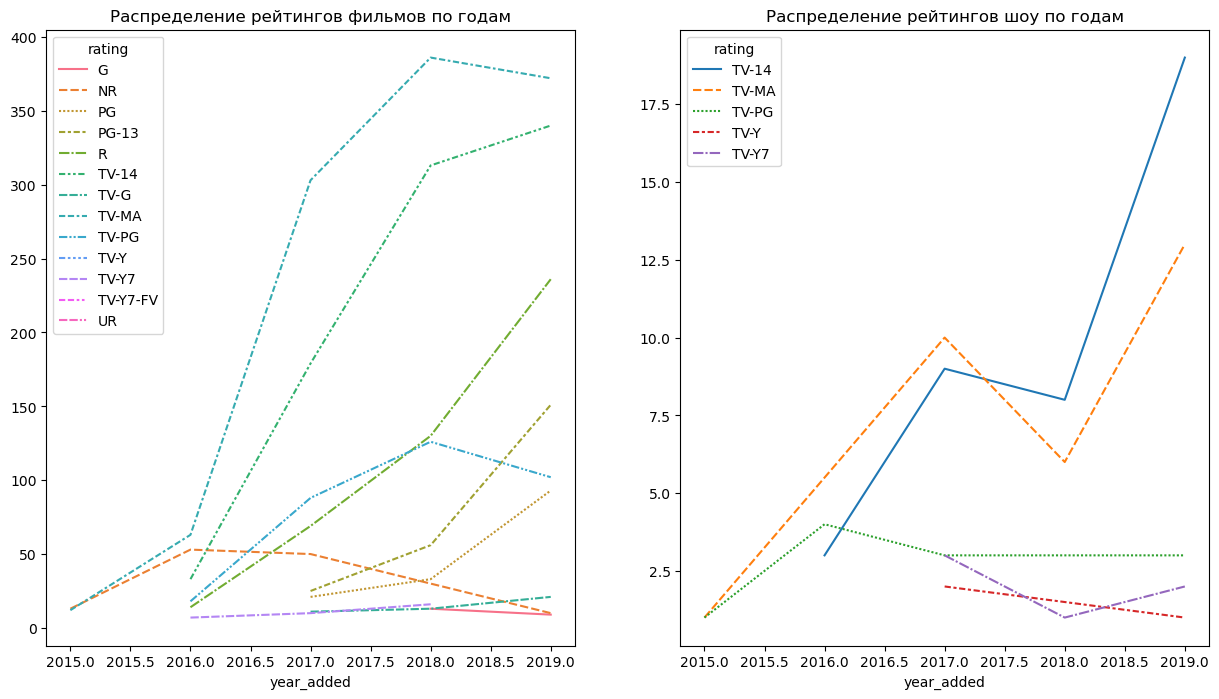

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_movies = movies[(movies.year_added > 2014)
                   & (movies.year_added < 2020)].groupby(
                       ['year_added',
                        'rating'])[['show_id']].count().reset_index()
df_shows = shows[(shows.year_added > 2014)
                 & (shows.year_added < 2020)].groupby(
                     ['year_added',
                      'rating'])[['show_id']].count().reset_index()

movies_wide = (df_movies.pivot(index="year_added",
                               columns="rating",
                               values="show_id")).dropna(
                                   axis=1, thresh=2).dropna(axis=0, thresh=2)
shows_wide = (df_shows.pivot(index="year_added",
                             columns="rating",
                             values="show_id")).dropna(
                                 axis=1, thresh=2).dropna(axis=0, thresh=2)

sns.lineplot(data=movies_wide[movies_wide > 5],
             ax=axs[0])
sns.lineplot(data=shows_wide,
             ax=axs[1])

axs[0].set_title('Распределение рейтингов фильмов по годам', fontsize=12);
axs[1].set_title('Распределение рейтингов шоу по годам', fontsize=12);

1. 2016-2017 год нетфликс выкладывали шоу в основном для подростков, затем для взрослых, для семейного просмотра и меньше всего для детей
2. 2017-2018 год нетфликс сосредоточился на шоу TV-MA, для подростков и семейных выкладовалось мало, кол-во шоу для детей не менялось
3. 2018-2019 год все больше шоу выпускались в основном на взрослую аудиторию, затем для подростков, чуть больше стало шоу для семьи и детей. 
4. с годами рейтинг TV-Y7-FV медленно падает

### Вывод
раньше нетфликс выкладывал больше шоу для подростков и для семейного просмотра, но с течением времени в последние 3 года он все больше ориентируется на контенте для взрослых

## 3. Связь между возрастным рейтингом и страной производства
Определить, есть ли различия в распределении рейтингов в зависимости от страны производства контента.

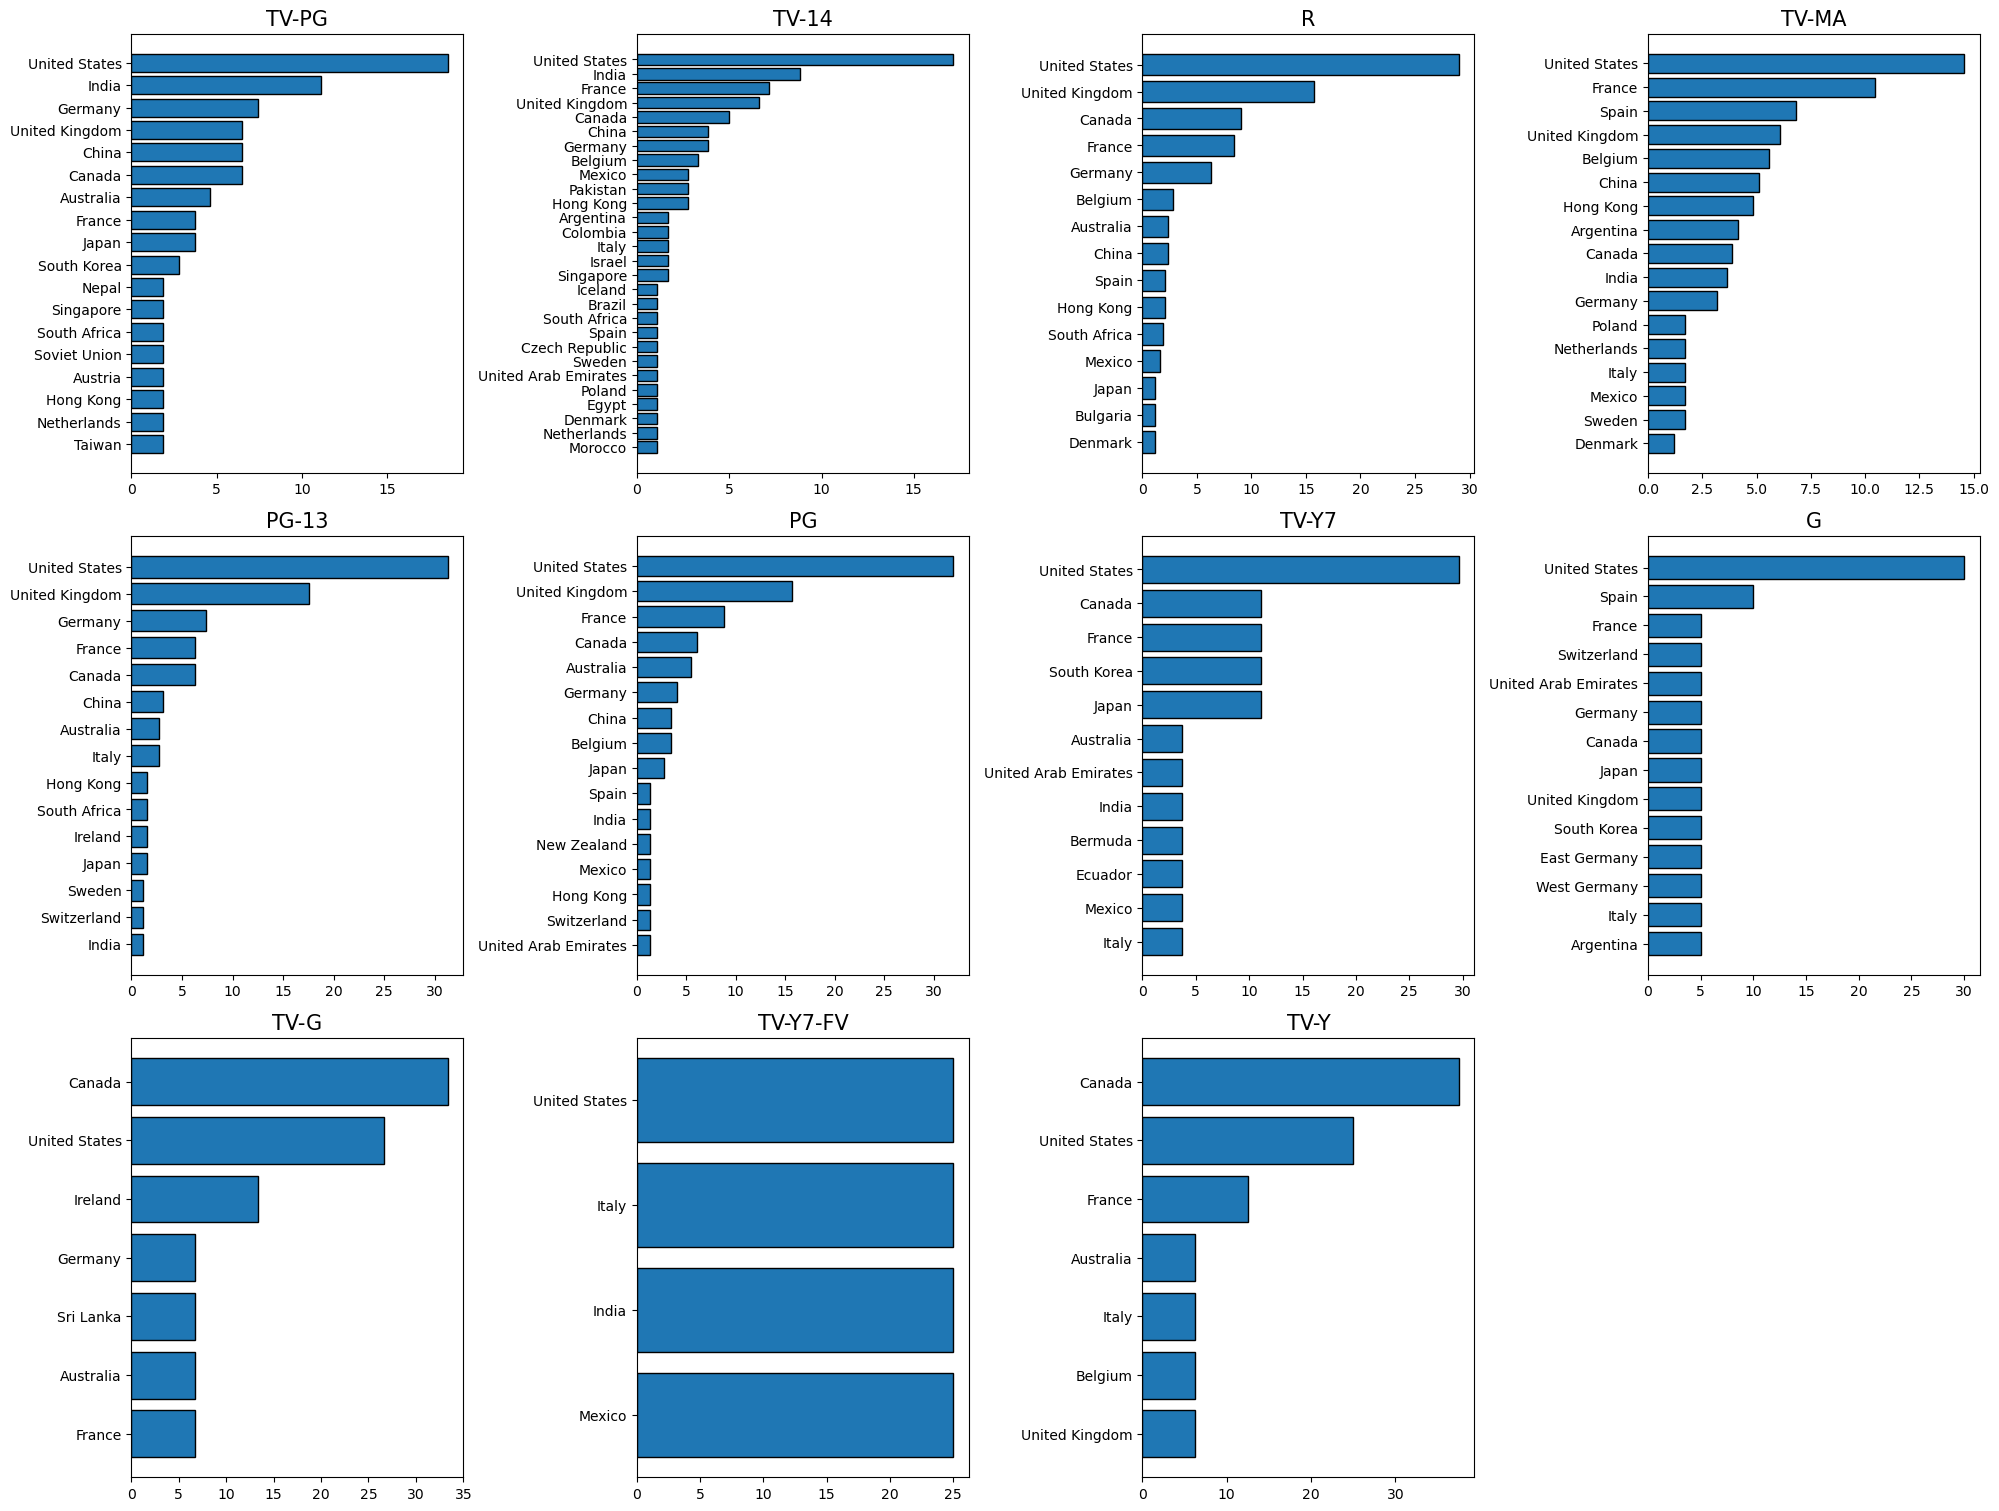

In [71]:
fig = plt.figure(figsize=(20, 20))
axs = []

length = math.ceil(math.sqrt(data.rating.nunique()))

for count, rating in enumerate(data.rating.unique(), 1):
    axs.append(fig.add_subplot(length, length, count))
    
    countries = parse(data[data.rating == rating].country)
    df = countries.value_counts(normalize=True).mul(100)
    df = df[df > 1]
 
    axs[count - 1].barh(y=df.index.to_list()[::-1],
       width=df.values[::-1],
       edgecolor='k');
    axs[count - 1].set_title(rating, fontsize=15)
plt.tight_layout()

### Вывод
- в детском контенте лидирует Канада 
- неоценены почему-то французкие фильмы
- в остальных рейтингах лидирует США

## 4. Категории/жанры и возрастные рейтинги
Исследовать, какие категории/жанры чаще всего имеют тот или иной возрастной рейтинг.

In [72]:
def ratings_genres(dataframe, title):
    ratings = dataframe.rating.value_counts()
    ratings = ratings[ratings > 1]
    fig, axs = plt.subplots(len(ratings), 1, figsize=(20, 20))

    for idx, rating in enumerate(ratings.index.to_list()):
        df = dataframe[dataframe.rating == rating].listed_in.value_counts()
        df = df.head(5)

        axs[idx].barh(y=df.index.to_list()[::-1],
                      width=df.values[::-1],
                      edgecolor='k')
        axs[idx].set_title(rating, fontsize=15)

    plt.suptitle(title, y=1, fontsize=25)
    plt.tight_layout()

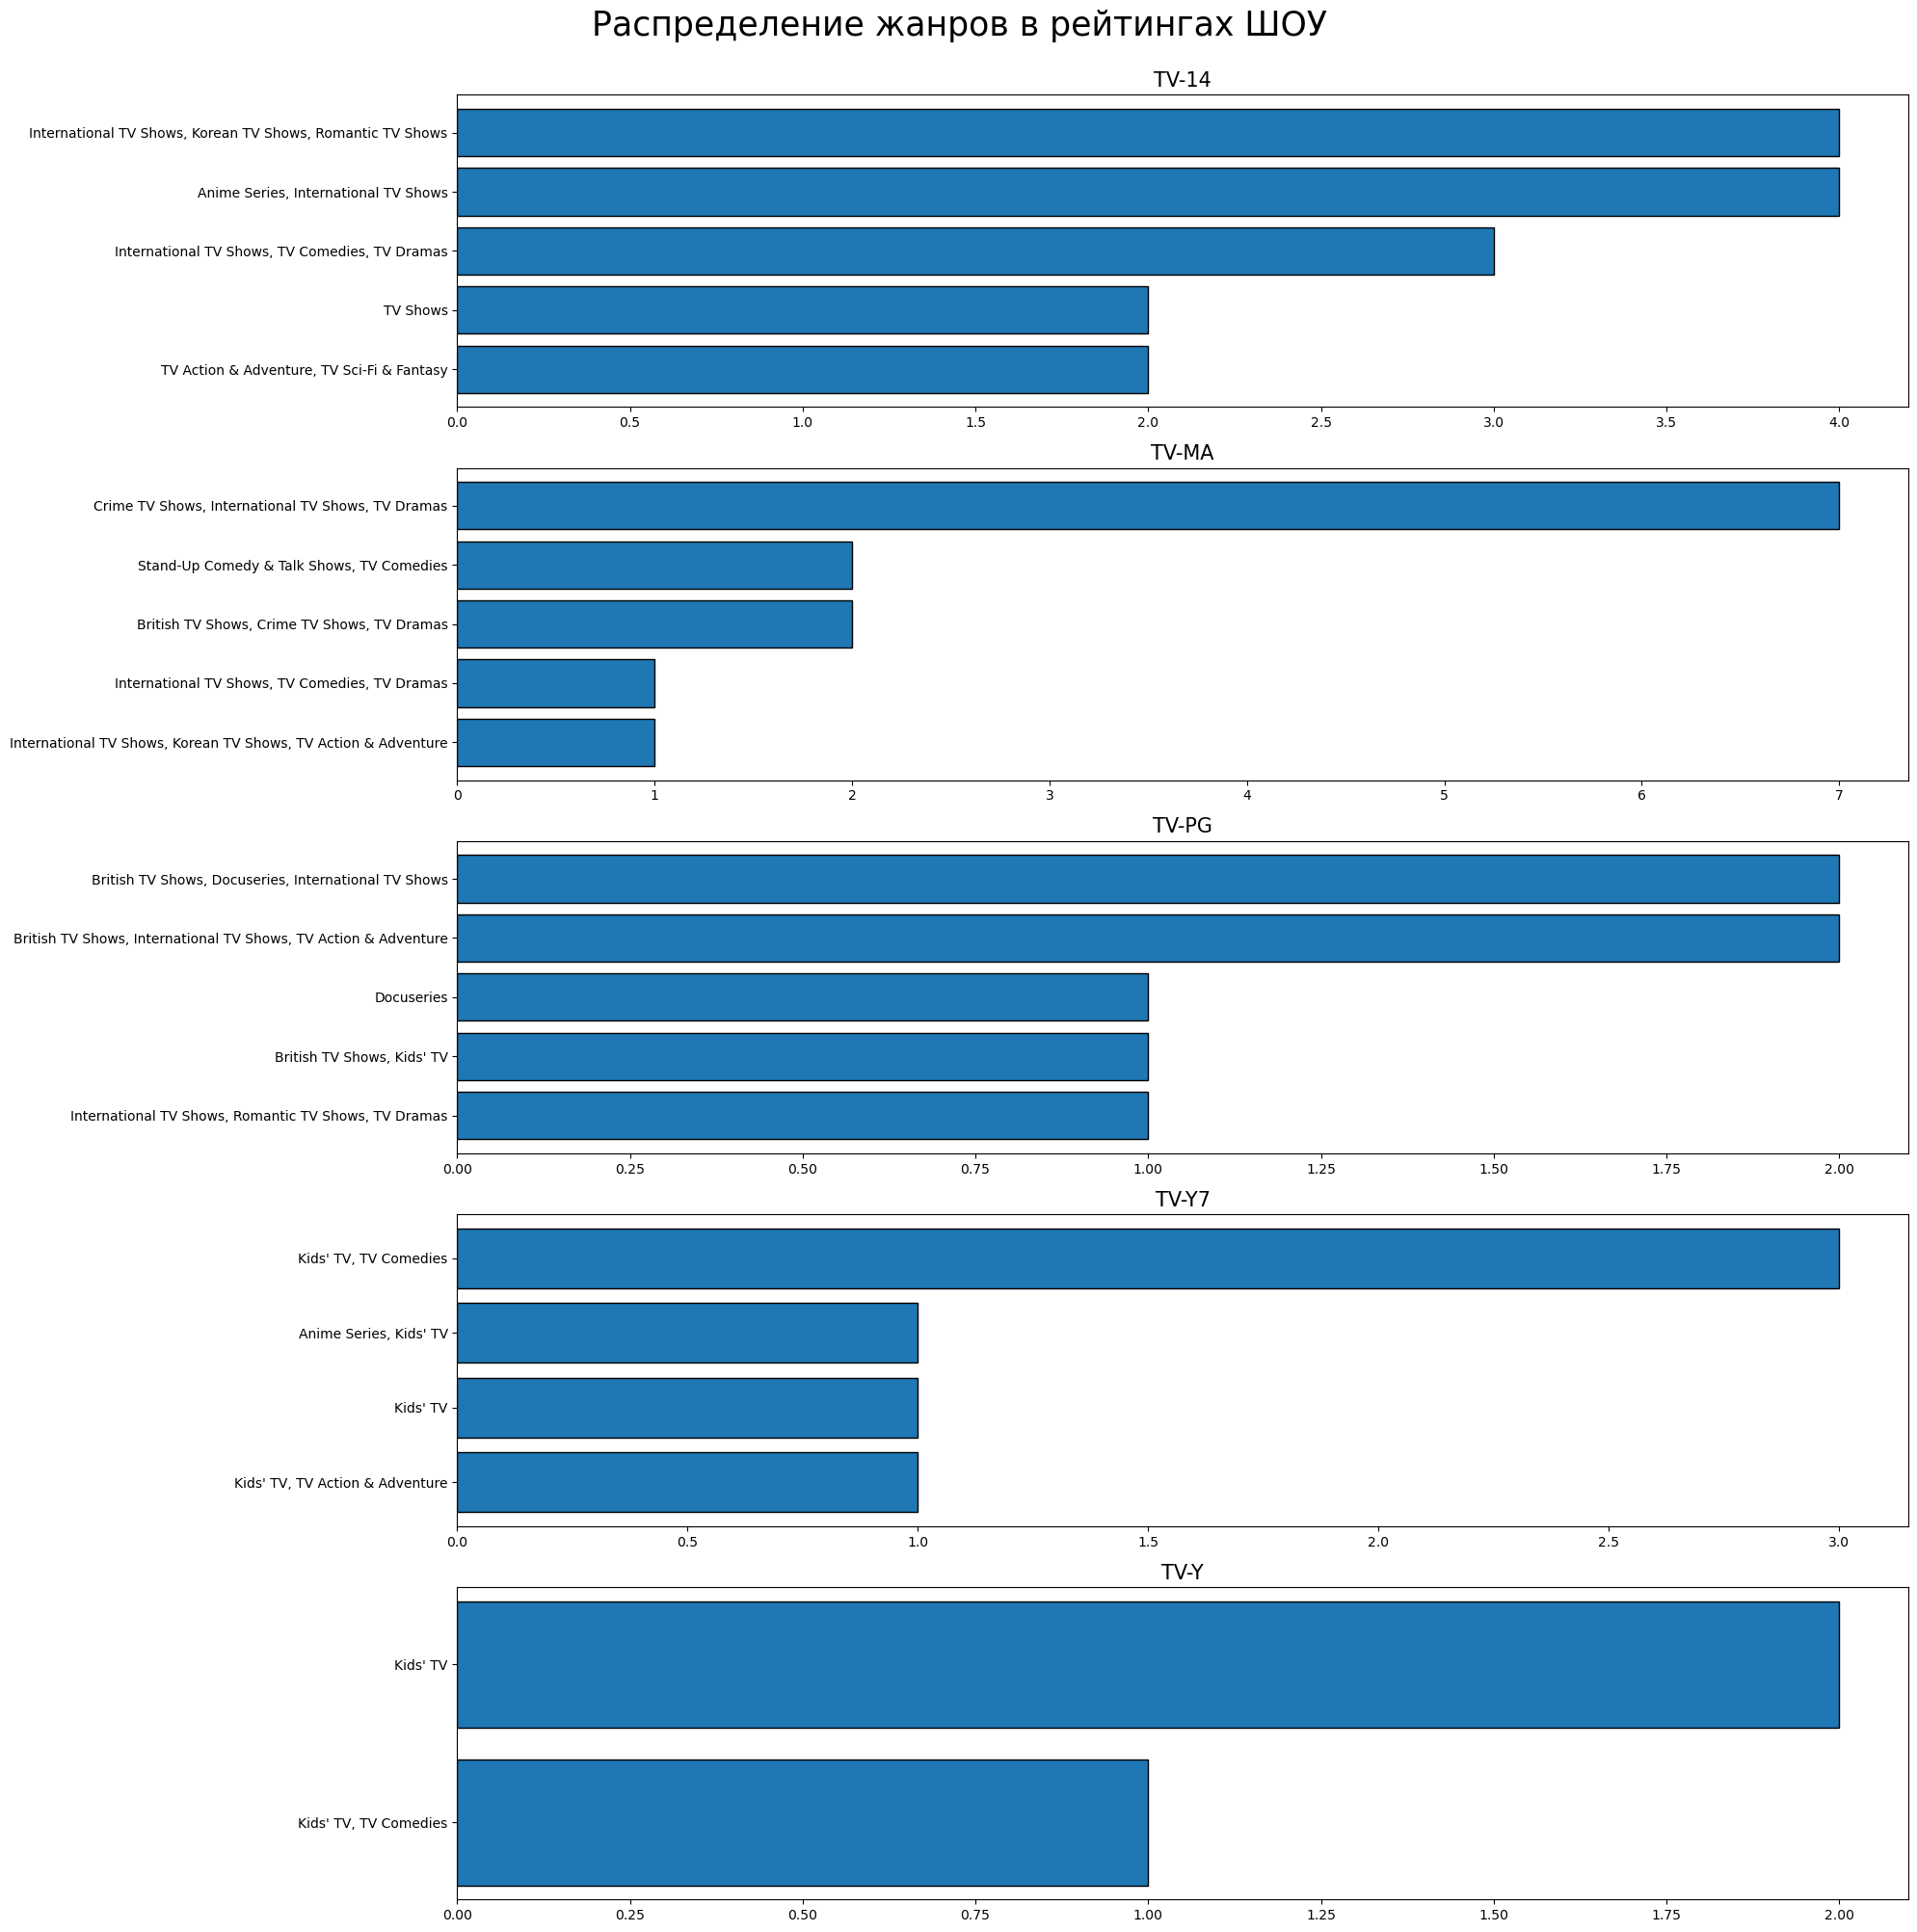

In [73]:
ratings_genres(shows, 'Распределение жанров в рейтингах ШОУ')

# в рейтинге для подростков лидируют категории корейских дорам, аниме, международных комедийных драм.
# в рейтинге для взрослых лидируют категории криминальных драм, стендапов, британских криминальных драм
# в рейтинге для семейного просмотра лидируют категории британских документалок
# в рейтингах для детей лидирует категория KidsTV

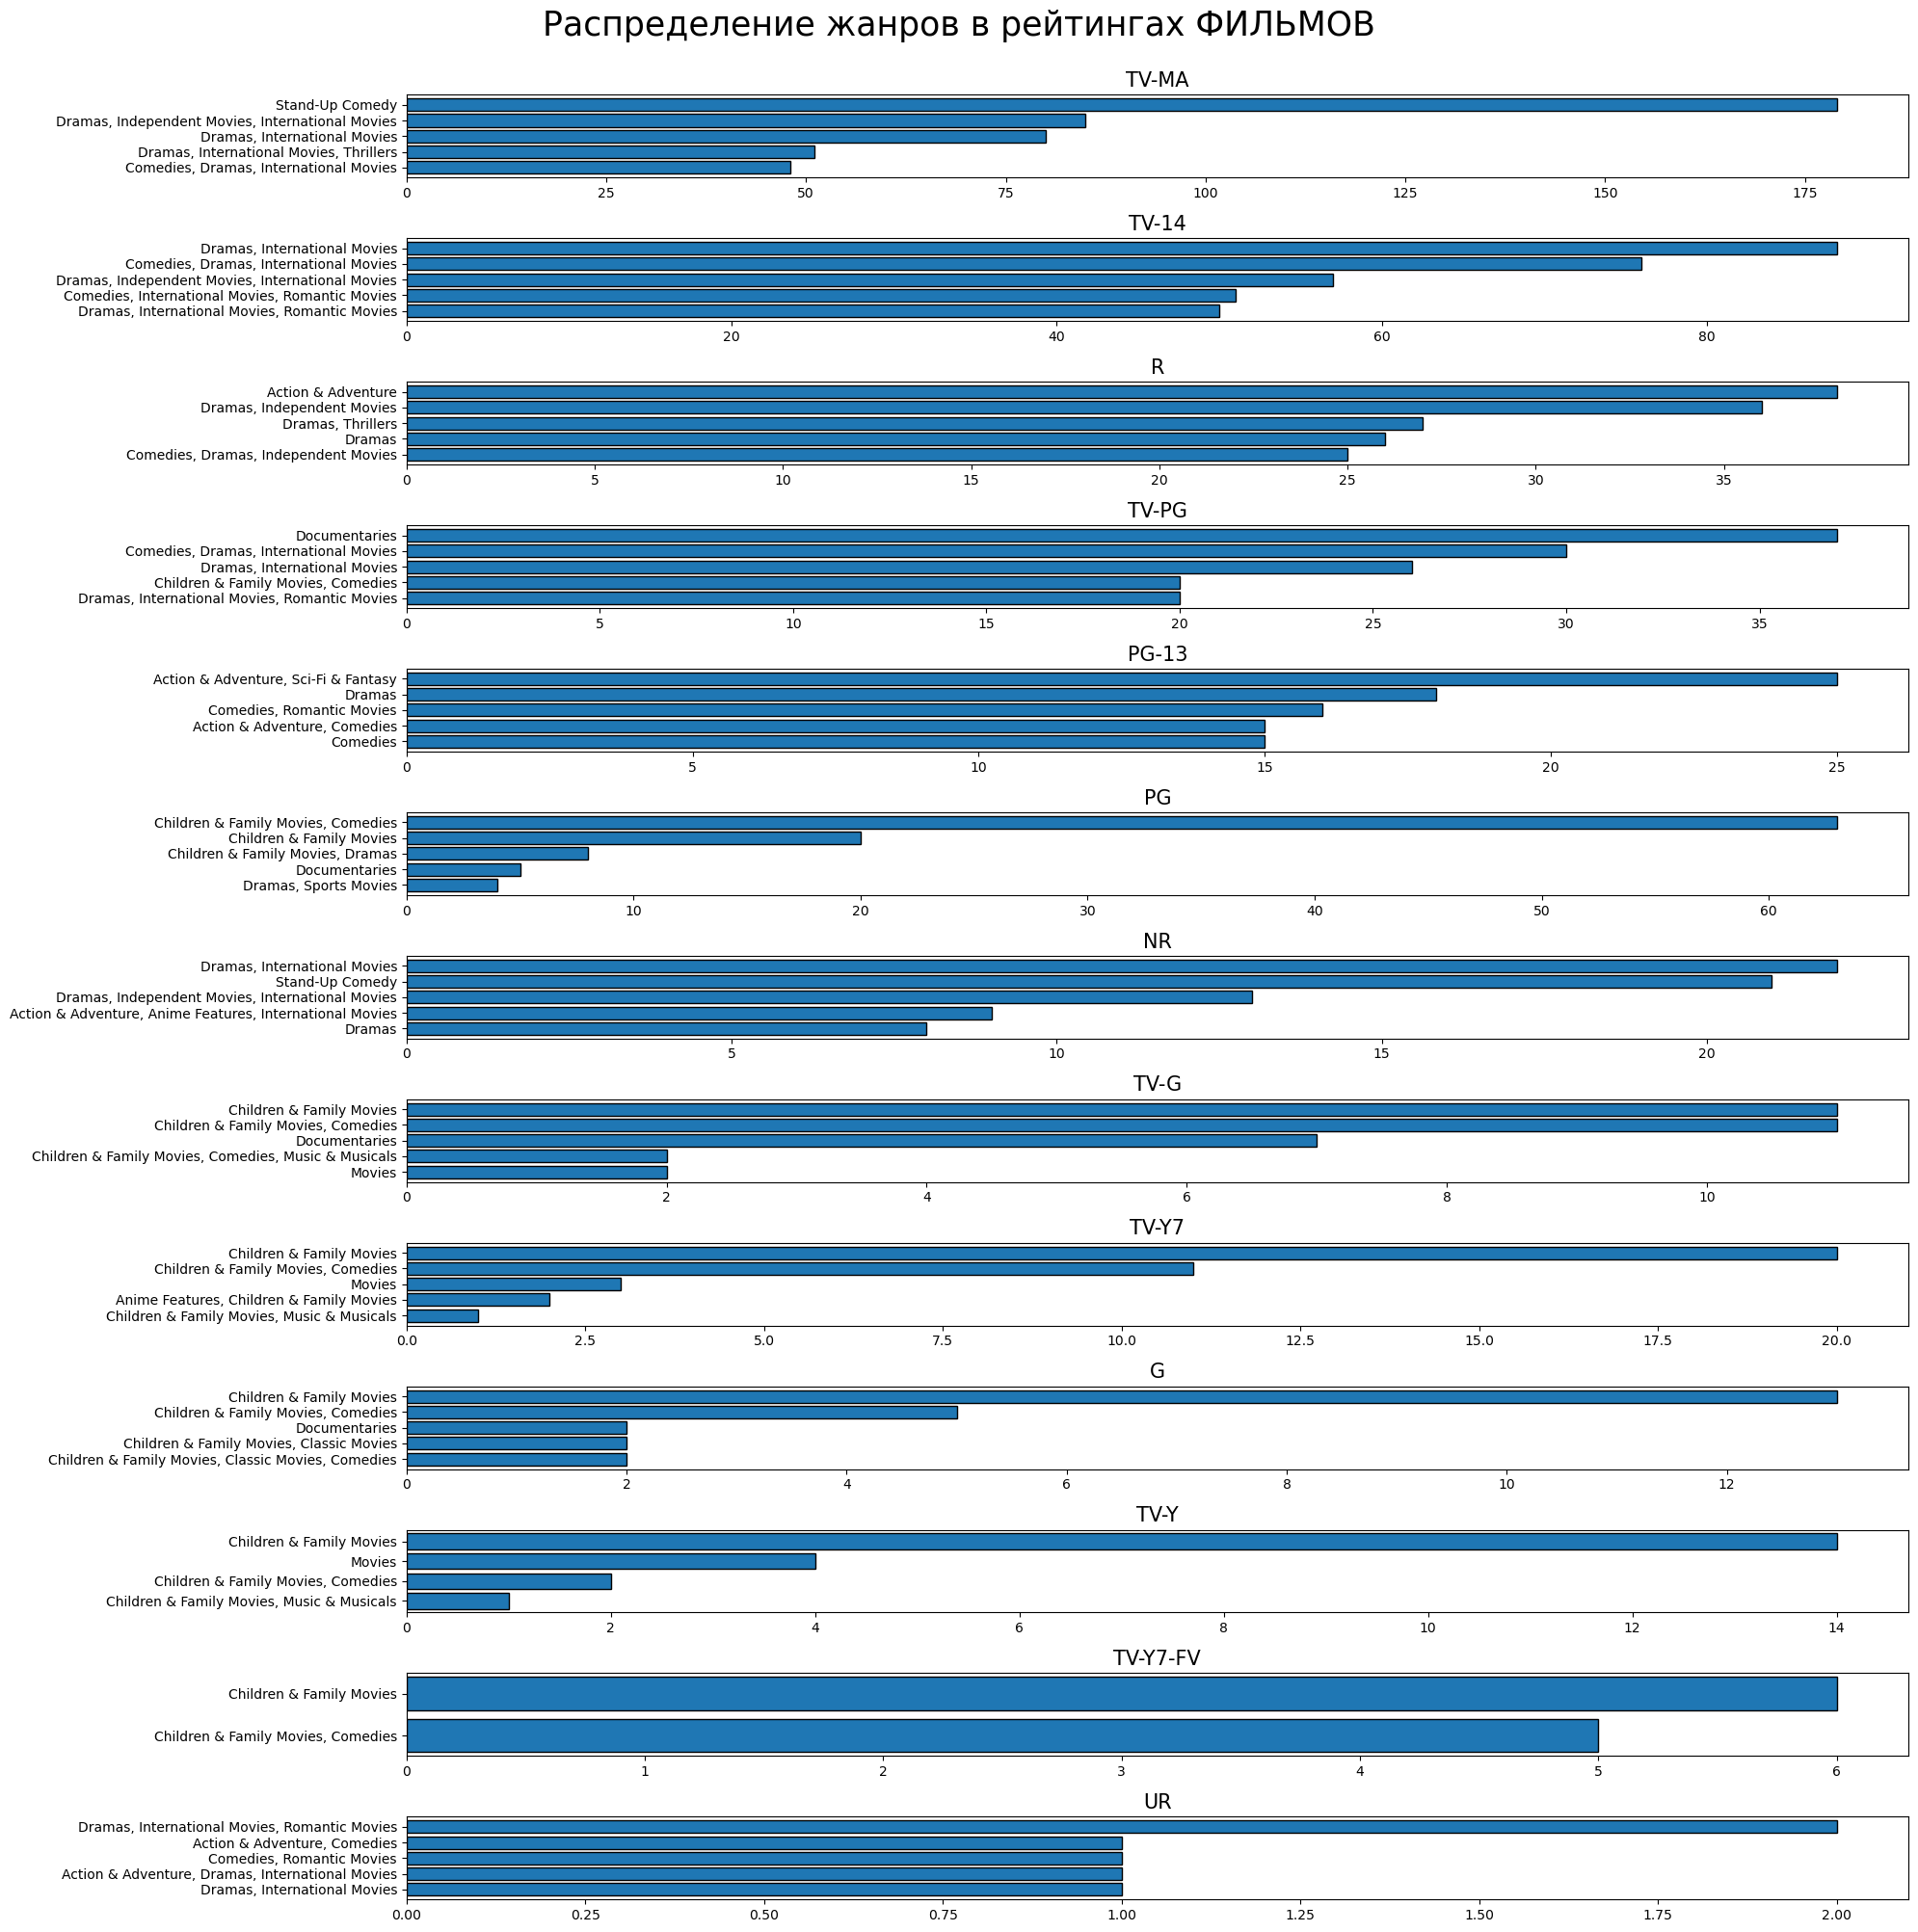

In [74]:
ratings_genres(movies, 'Распределение жанров в рейтингах ФИЛЬМОВ')

# в фильмах лидирующий жанр стендап комедий
# в фильмах для подростков лидируют драмы 
# в фильмах с рейтингом R лидирует жанр приключенческий боевик
# в фильмах для семейного просмотра лидируют документалки и фильмы для детей
#  в рейтингах TV-G TV-Y7 G TV-Y TV-Y7-FV лидируют фильмы для детей

### Вывод

Исследовать, какие категории/жанры чаще всего имеют тот или иной возрастной рейтинг.

в фильмах:
- в фильмах лидирующий жанр стендап комедий
- в фильмах для подростков лидируют драмы 
- в фильмах с рейтингом R лидирует жанр приключенческий боевик
- в фильмах для семейного просмотра лидируют документалки и фильмы для детей
- в рейтингах TV-G TV-Y7 G TV-Y TV-Y7-FV лидируют фильмы для детей

в шоу\сериалах:
- в рейтинге для подростков лидируют категории корейских дорам, аниме, международных комедийных драм.
- в рейтинге для взрослых лидируют категории криминальных драм, стендапов, британских криминальных драм
- в рейтинге для семейного просмотра лидируют категории британских документалок
- в рейтингах для детей лидирует категория KidsTV

## 5. Корреляция продолжительности контента с возрастным рейтингом 
Проверить, существует ли связь между продолжительностью фильмов/сериалов и их возрастным рейтингом.

In [75]:
movies.rating.value_counts()
# убрала NC-17, тк там всего лишь 1 значение

rating
TV-MA       1157
TV-14        878
R            500
TV-PG        344
PG-13        278
PG           176
NR           175
TV-G          53
TV-Y7         42
G             35
TV-Y          21
TV-Y7-FV      11
UR             7
Name: count, dtype: int64

In [76]:
movies[movies.rating != 'NC-17'].rating.value_counts()

rating
TV-MA       1157
TV-14        878
R            500
TV-PG        344
PG-13        278
PG           176
NR           175
TV-G          53
TV-Y7         42
G             35
TV-Y          21
TV-Y7-FV      11
UR             7
Name: count, dtype: int64

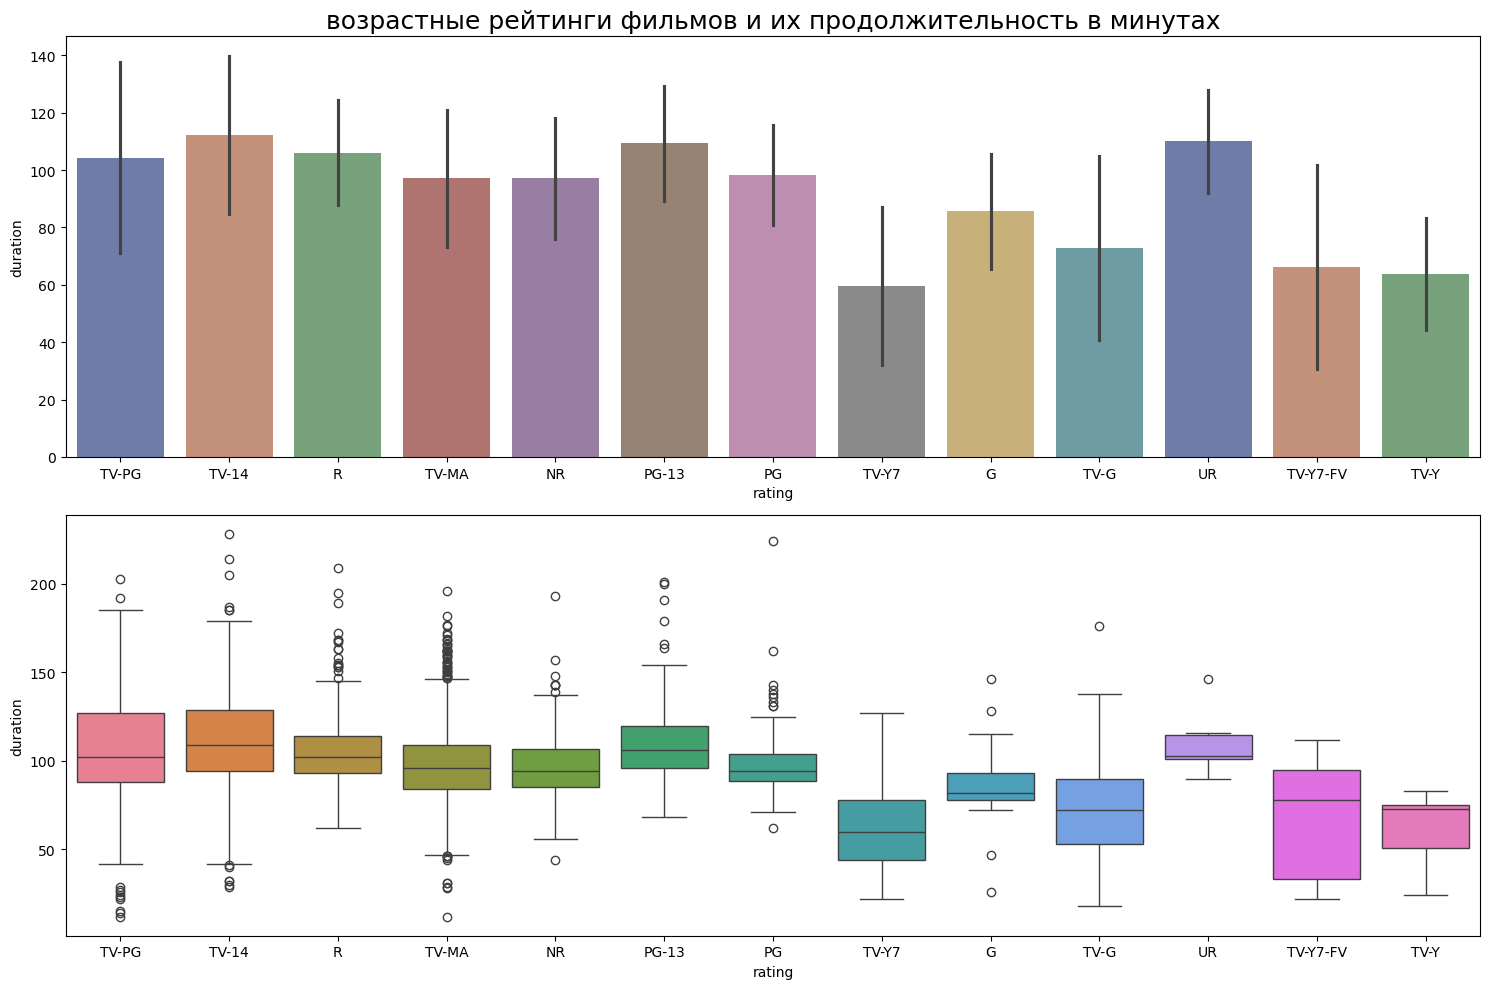

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].set_title('возрастные рейтинги фильмов и их продолжительность в минутах', fontsize=18);
sns.barplot(
    data=movies[movies.rating != 'NC-17'], 
    x="rating", 
    y="duration", 
    hue="rating",
    errorbar="sd",
    palette="dark", 
    alpha=.6, 
    ax=axs[0]
)

sns.boxplot(data=movies, hue='rating', x='rating', y='duration', ax=axs[1]);
plt.tight_layout();

# меньше всего длятся фильмы для детей
# больше всего длятся фильмы для подростков (от 13 и 14 лет) и для взрослой аудитории (R)

In [78]:
shows.duration = shows.duration.apply(lambda x: int(x.split(" ")[0]))
# перевожу столбец в тип int

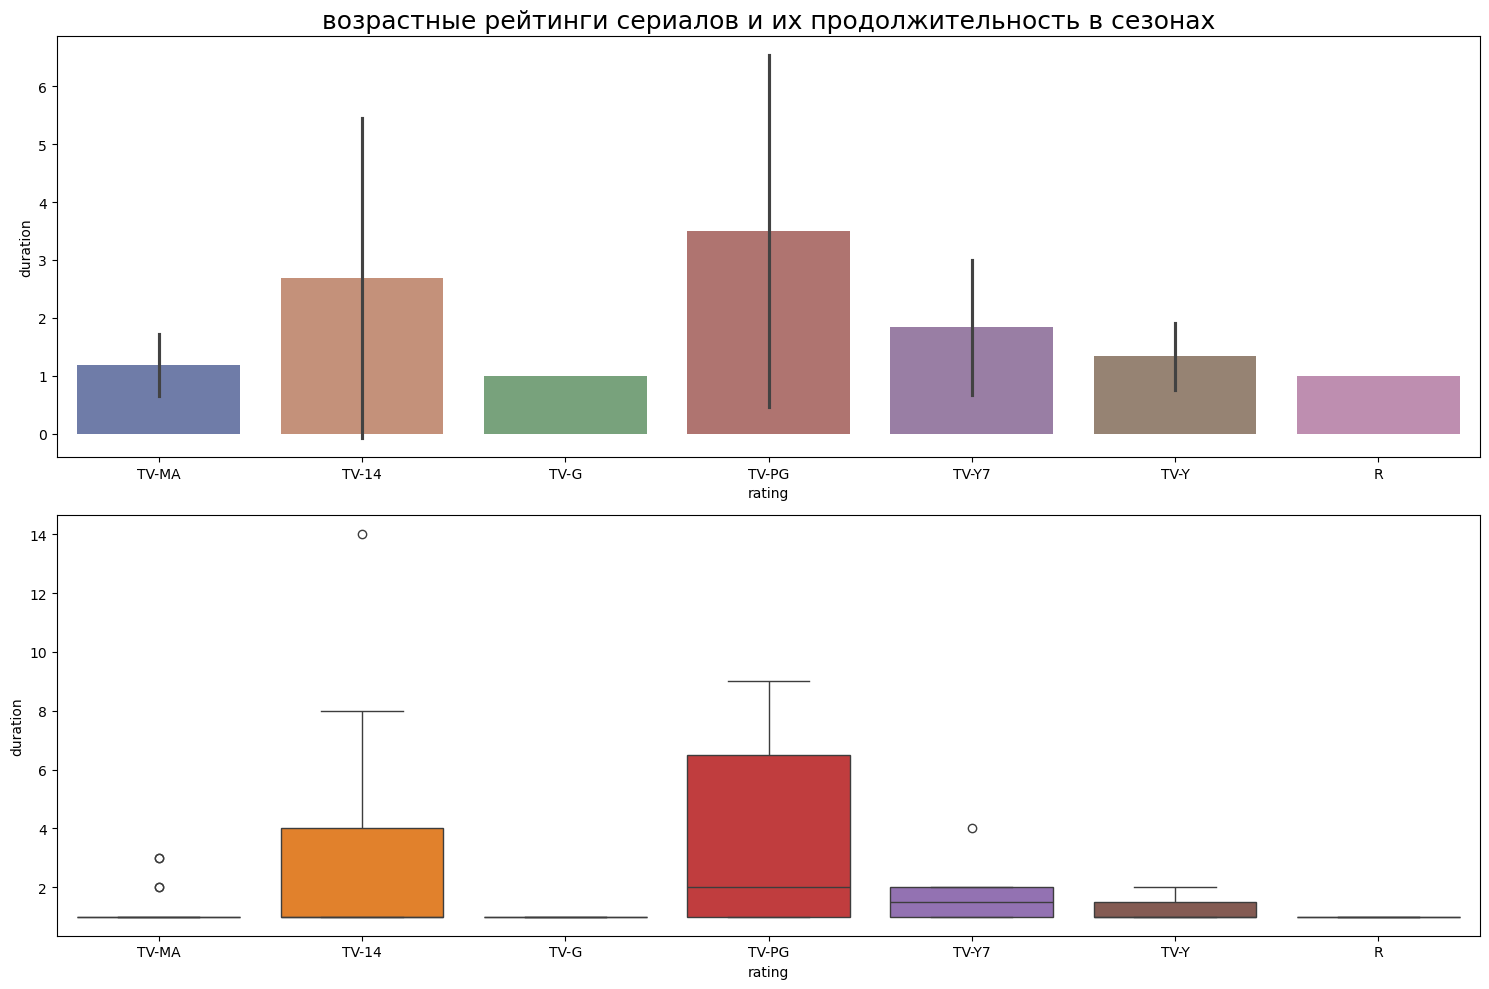

In [79]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].set_title('возрастные рейтинги сериалов и их продолжительность в сезонах', fontsize=18);
sns.barplot(
    data=shows, 
    x="rating", 
    y="duration", 
    hue="rating",
    errorbar="sd",
    palette="dark", 
    alpha=.6, 
    ax=axs[0]
)

sns.boxplot(data=shows, hue='rating', x='rating', y='duration', ax=axs[1]);
plt.tight_layout();

шоу для взрослых обычно длятся 1-2 сезона, шоу для подростков и детей длятся обычно больше. Больше всего сезонов у шоу для семейного просмотра (TV-PG)

### Вывод

Проверить, существует ли связь между продолжительностью фильмов/сериалов и их возрастным рейтингом.


корреляция между продолжительностью фильмов/сериалов и их возрастным рейтингом существует. 


продолжительность фильмов:
- фильмы для детей длятся меньше, чем фильмы для взрослой аудитории.
- фильмы для подростков 14+ длятся дольше чем семейные фильмы и 17+


продолжительность шоу:
- у шоу для всей семьи, для детей и для подростков кол-во сезонов больше чем у шоу для взрослой аудитории